In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Import Data

In [2]:
train = pd.read_csv('data/data/train.csv')
weather = pd.read_csv('data/data/weather.csv')
spray = pd.read_csv('data/data/spray.csv')
test = pd.read_csv('data/data/test.csv')

# Train Data

In [3]:
train.head()

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

In [4]:
train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [5]:
# Change columns name to be in lower case
train.columns = [col.lower() for col in train.columns]

In [6]:
train.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent'],
      dtype='object')

In [7]:
# There are 10,506 rows and 12 columns
train.shape

(10506, 12)

In [8]:
# Looks for missing values
# Train data has no missing values
train.isnull().sum()

date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvpresent                0
dtype: int64

In [9]:
train.dtypes

date                       object
address                    object
species                    object
block                       int64
street                     object
trap                       object
addressnumberandstreet     object
latitude                  float64
longitude                 float64
addressaccuracy             int64
nummosquitos                int64
wnvpresent                  int64
dtype: object

it's seem like every columns have a correct data type except date column, so we have to change type of date column first.

In [11]:
# Change data type of date column from object to date time
train['date'] = pd.to_datetime(train['date'])

In [12]:
train.dtypes

date                      datetime64[ns]
address                           object
species                           object
block                              int64
street                            object
trap                              object
addressnumberandstreet            object
latitude                         float64
longitude                        float64
addressaccuracy                    int64
nummosquitos                       int64
wnvpresent                         int64
dtype: object

Since I want to compare how westnile virus change over time, so I created new columns which are year, month and day.

In [13]:
# Create new columns (year, month, day)
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

In [14]:
train.head()

date                                            address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  species  block           street  trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              addressnumberandstreet   latitude  longitude  addressaccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   nummosquitos  wnvpresent  year  month  day  
0             1           0  2007      5   29  
1             1           0  2007      5   29  
2             1           0  2007      5   29  
3             1           0  2007      5   29  
4             4           0  2007      5   29

In [15]:
# Set date to be index
train = train.set_index('date')

In [16]:
train.head()

address  \
date                                                            
2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                           species  block           street  trap  \
date                                                               
2007-05-29  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
2007-05-29          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2007-05-29          CULEX RESTUANS     62    N MANDELL AVE  T007   
2007-05-29  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
2007-05-29          CULEX RESTUANS     79     W FOSTER AVE  T015   

                       addressnumberandstreet   latitude  longitude  \
date                                                                  
2007-05-29  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
2007-05-29  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
2007-05-29   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279   
2007-05-29    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   
2007-05-29    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   

            addressaccuracy  nummosquitos  wnvpresent  year  month  day  
date                                                                     
2007-05-29                9             1           0  2007      5   29  
2007-05-29                9             1           0  2007      5   29  
2007-05-29                9             1           0  2007      5   29  
2007-05-29                8             1           0  2007      5   29  
2007-05-29                8             4           0  2007      5   29

## West Nile Virus Present

-  This column tells us that if West Nile virus is present in that area it will has value as 1 and 0 if the virus didn't occur.

In [18]:
# Look majority of the data don't have the virus
train['wnvpresent'].value_counts()

0    9955
1     551
Name: wnvpresent, dtype: int64

In [17]:
train['wnvpresent'].value_counts(normalize = True)

0    0.947554
1    0.052446
Name: wnvpresent, dtype: float64

There are only 551 west nile virus present between 2007 - 2013.

In [20]:
# Create data frame that all of rows west nile virus is present
wnv_df = train[train['wnvpresent'] == 1]
wnv_df.head()

address  \
date                                                         
2007-07-18  3800 East 115th Street, Chicago, IL 60617, USA   
2007-07-25             South Doty Avenue, Chicago, IL, USA   
2007-07-25             South Doty Avenue, Chicago, IL, USA   
2007-07-25             South Doty Avenue, Chicago, IL, USA   
2007-07-25             South Doty Avenue, Chicago, IL, USA   

                           species  block       street  trap  \
date                                                           
2007-07-18  CULEX PIPIENS/RESTUANS     38   E 115TH ST  T215   
2007-07-25  CULEX PIPIENS/RESTUANS     12   S DOTY AVE  T115   
2007-07-25  CULEX PIPIENS/RESTUANS     12   S DOTY AVE  T115   
2007-07-25           CULEX PIPIENS     12   S DOTY AVE  T115   
2007-07-25           CULEX PIPIENS     12   S DOTY AVE  T115   

                   addressnumberandstreet   latitude  longitude  \
date                                                              
2007-07-18  3800  E 115TH ST, Chicago, IL  41.686398 -87.531635   
2007-07-25  1200  S DOTY AVE, Chicago, IL  41.673408 -87.599862   
2007-07-25  1200  S DOTY AVE, Chicago, IL  41.673408 -87.599862   
2007-07-25  1200  S DOTY AVE, Chicago, IL  41.673408 -87.599862   
2007-07-25  1200  S DOTY AVE, Chicago, IL  41.673408 -87.599862   

            addressaccuracy  nummosquitos  wnvpresent  year  month  day  
date                                                                     
2007-07-18                8            50           1  2007      7   18  
2007-07-25                5            50           1  2007      7   25  
2007-07-25                5            50           1  2007      7   25  
2007-07-25                5            50           1  2007      7   25  
2007-07-25                5            50           1  2007      7   25

In [21]:
wnv_df.groupby('year')['wnvpresent'].sum()

year
2007    236
2009     19
2011     57
2013    239
Name: wnvpresent, dtype: int64

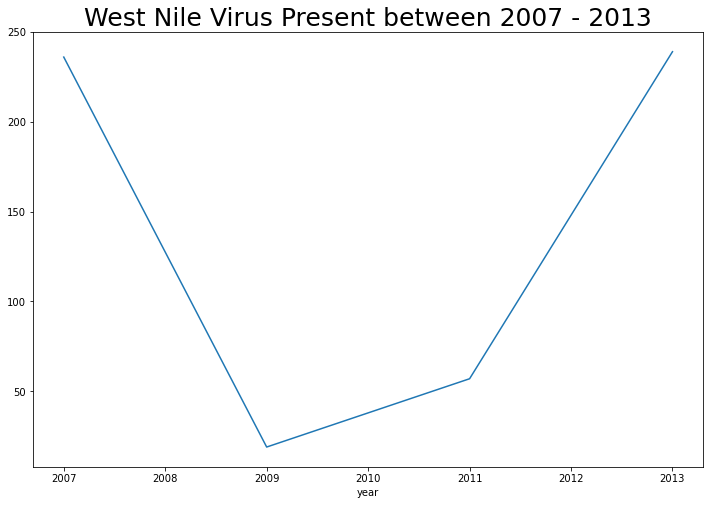

In [22]:
plt.figure(figsize = (12,8))
wnv_df.groupby('year')['wnvpresent'].sum().plot()
plt.title('West Nile Virus Present between 2007 - 2013', fontsize = 25);

We can see that in 2007 there are many West Nile virus occur in Chicago and tends to decrease in 2008, but in 2013 it's look like the virus keep spreading again.

## Mosquito

### Num Mosquito

-  This columns shows number of mosquito that caught by trap in Chicago
-  If the number of mosquitos exceed than 50, it will generate new record (new row)

In [23]:
# There are 135,039 mosquito caughts in this data
train['nummosquitos'].sum()

135039

In [24]:
# There are 120,520 mosquitos that didn't contain the virus and there are 14,519 mosquitos that contain the virus
train.groupby('wnvpresent')['nummosquitos'].sum()

wnvpresent
0    120520
1     14519
Name: nummosquitos, dtype: int64

In [25]:
# Look for how number of mosquitos change in each year
train.groupby('year')['nummosquitos'].sum()

year
2007    58688
2009    21108
2011    18799
2013    36444
Name: nummosquitos, dtype: int64

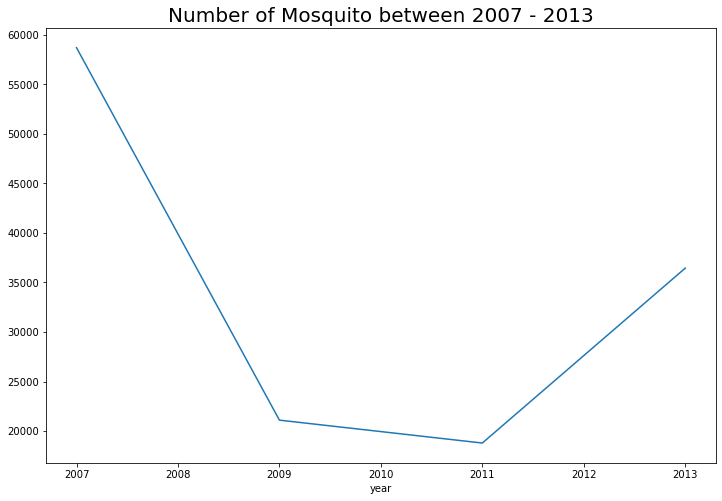

In [28]:
plt.figure(figsize = (12,8))
train.groupby('year')['nummosquitos'].sum().plot()
plt.title('Number of Mosquito between 2007 - 2013', fontsize = 20);

We can see that in 2007 number of mosquitos in Chicago is almost 60,000 then drop to around 20,000 in 2009 and slightly drop to 18,000 in 2011, but increase in 2013 to around 35,000.

In [29]:
# Look for how number of mosquitos with the virus change in each year
wnv_df.groupby('year')['nummosquitos'].sum()

year
2007    6714
2009     400
2011    1193
2013    6212
Name: nummosquitos, dtype: int64

Text(0.5, 1.0, 'Number Mosquito with West Nile virus between 2007 - 2013')

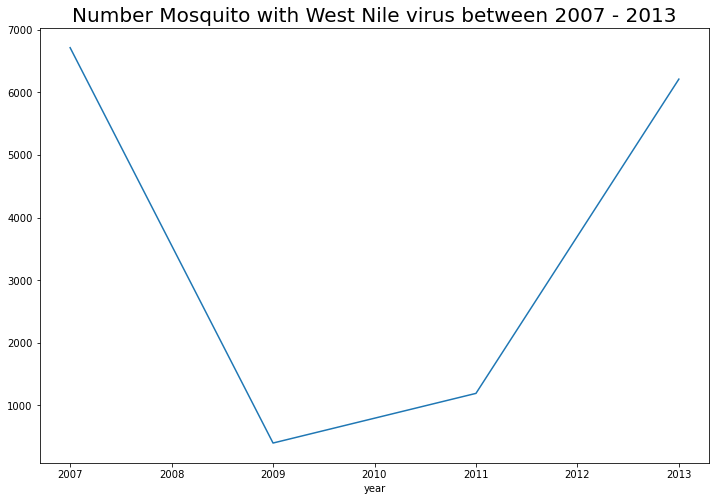

In [30]:
plt.figure(figsize = (12,8))
wnv_df.groupby('year')['nummosquitos'].sum().plot()
plt.title('Number Mosquito with West Nile virus between 2007 - 2013', fontsize = 20)

In [31]:
# How number of mosquitos change in each month
mosquito_df = pd.DataFrame(train.groupby(['year','month'])['nummosquitos'].sum())
mosquito_df.head()

nummosquitos
year month              
2007 5                40
     6               428
     7              7199
     8             40015
     9              9300

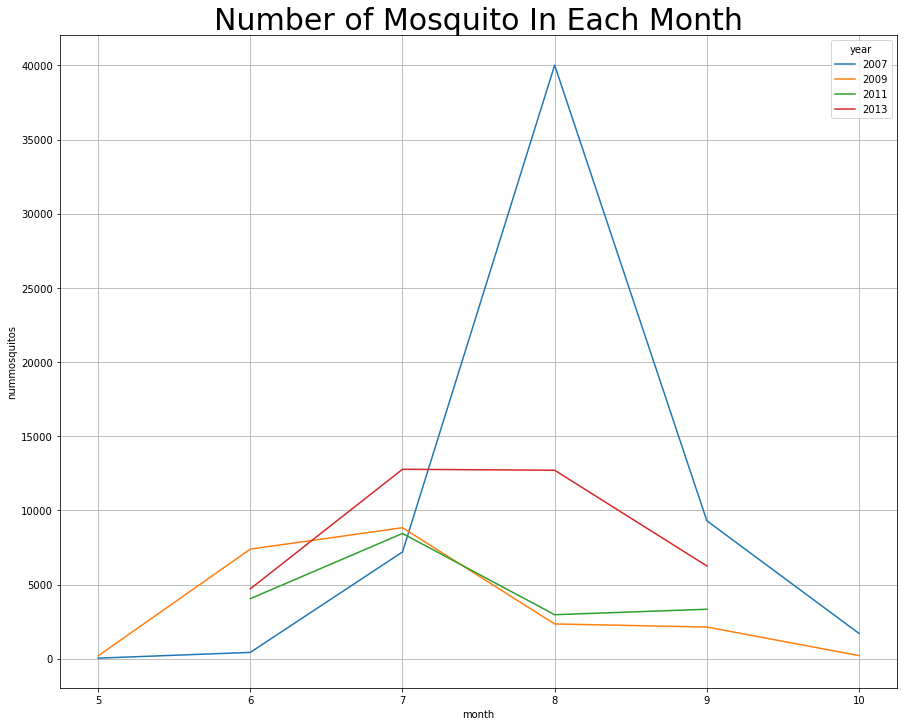

In [32]:
plt.figure(figsize = (15,12))
sns.lineplot(x = 'month', y = 'nummosquitos', data = mosquito_df, hue = 'year', palette = 'tab10')
plt.grid()
plt.title('Number of Mosquito In Each Month', fontsize = 30);

From the graph we can see that number of mosquito tend to increase between June and July. So we can make the assumption that number of mosquito has relation with rain or humidity because between June and September is a rainy season.

In [33]:
mosquito_df = pd.DataFrame(wnv_df.groupby(['year','month'])['nummosquitos'].sum())
mosquito_df.head()

nummosquitos
year month              
2007 7               300
     8              5856
     9               538
     10               20
2009 7               158

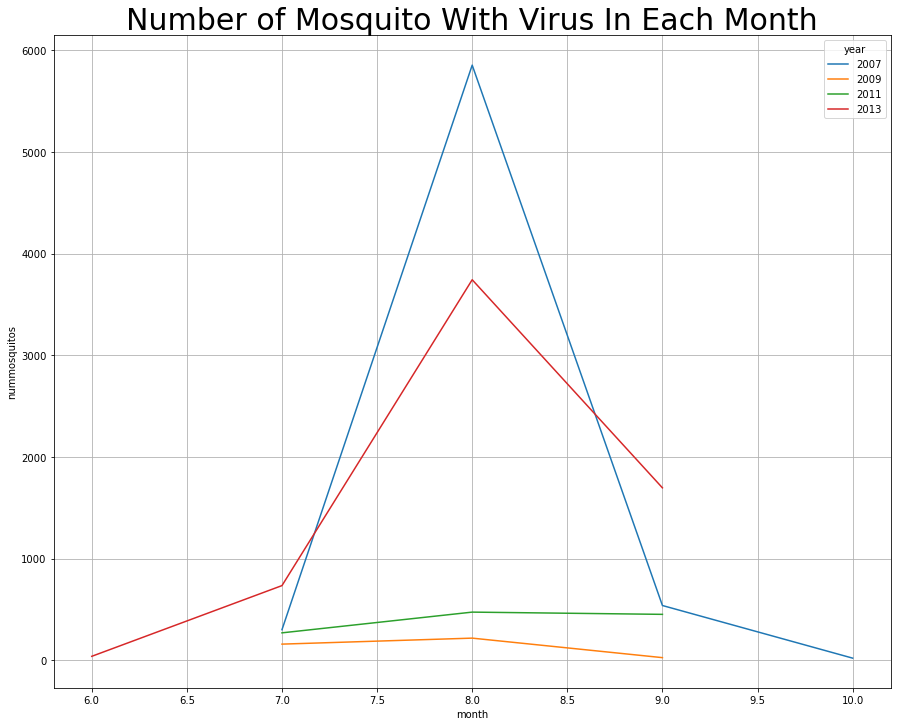

In [34]:
plt.figure(figsize = (15,12))
sns.lineplot(x = 'month', y = 'nummosquitos', data = mosquito_df, hue = 'year', palette = 'tab10')
plt.grid()
plt.title('Number of Mosquito With Virus In Each Month', fontsize = 30);

From the graph we can see that number of mosquitos with the virus are start increasing in July then reach the peak in August ater that it start dropping.

### Species

-  This columns represent the species of mosquitos

In [35]:
train['species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: species, dtype: int64

We can see that in this data majority of the species are Culex PIPENS/RESTUANS, Culex RESTUANS and Culex PIPENS.

In [36]:
train.groupby('wnvpresent')['species'].value_counts()

wnvpresent  species               
0           CULEX PIPIENS/RESTUANS    4490
            CULEX RESTUANS            2691
            CULEX PIPIENS             2459
            CULEX TERRITANS            222
            CULEX SALINARIUS            86
            CULEX TARSALIS               6
            CULEX ERRATICUS              1
1           CULEX PIPIENS/RESTUANS     262
            CULEX PIPIENS              240
            CULEX RESTUANS              49
Name: species, dtype: int64

Look like only three species of mosquito contain the west nile virus.

In [37]:
wnv_df.groupby('year')['species'].value_counts()

year  species               
2007  CULEX PIPIENS             147
      CULEX PIPIENS/RESTUANS     83
      CULEX RESTUANS              6
2009  CULEX PIPIENS/RESTUANS     13
      CULEX RESTUANS              6
2011  CULEX PIPIENS/RESTUANS     42
      CULEX RESTUANS              9
      CULEX PIPIENS               6
2013  CULEX PIPIENS/RESTUANS    124
      CULEX PIPIENS              87
      CULEX RESTUANS             28
Name: species, dtype: int64

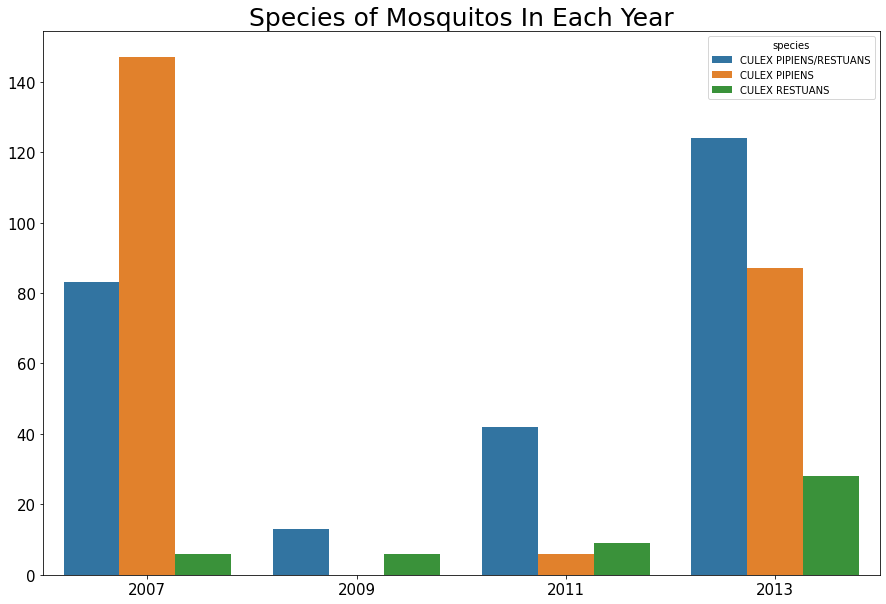

In [44]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'year', data = wnv_df, hue = 'species')
plt.title('Species of Mosquitos In Each Year', fontsize = 25)
plt.yticks(fontsize = 15)
plt.xticks(rotation = 0, fontsize = 15)
plt.xlabel('')
plt.ylabel('');

Since the majority of mosquito species are Culex pipiens/restuans, culex restuans and culex pipiens, I will label other species as other.

In [45]:
new_species = []
for i in train['species']:
    if i not in ['CULEX PIPIENS/RESTUANS','CULEX RESTUANS','CULEX PIPIENS']:
        new_species.append('other')
    else:
        new_species.append(i)
new_species[:15]

['CULEX PIPIENS/RESTUANS',
 'CULEX RESTUANS',
 'CULEX RESTUANS',
 'CULEX PIPIENS/RESTUANS',
 'CULEX RESTUANS',
 'CULEX RESTUANS',
 'CULEX RESTUANS',
 'CULEX PIPIENS/RESTUANS',
 'CULEX RESTUANS',
 'CULEX RESTUANS',
 'CULEX PIPIENS/RESTUANS',
 'CULEX PIPIENS/RESTUANS',
 'CULEX RESTUANS',
 'CULEX PIPIENS/RESTUANS',
 'CULEX RESTUANS']

In [46]:
train['species'] = new_species

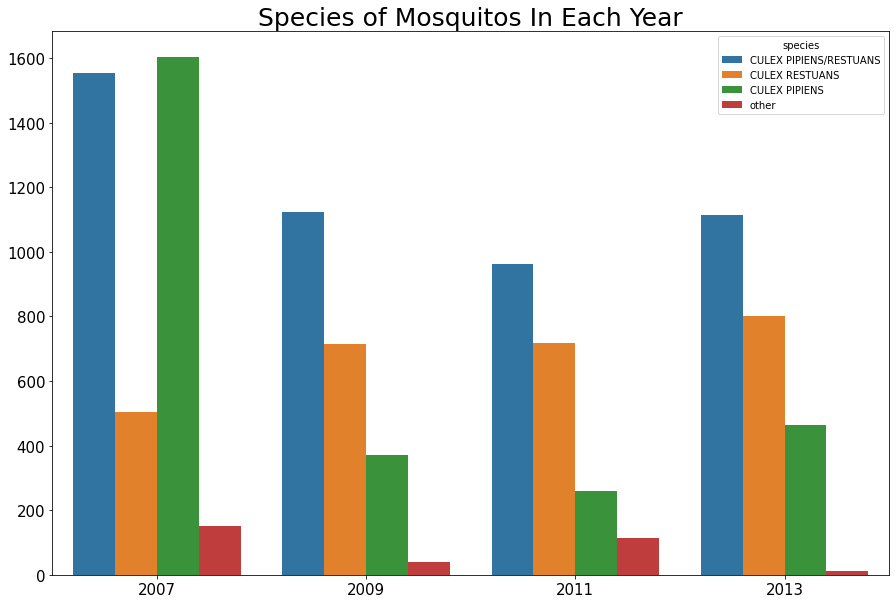

In [47]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'year', data = train, hue = 'species')
plt.title('Species of Mosquitos In Each Year', fontsize = 25)
plt.yticks(fontsize = 15)
plt.xticks(rotation = 0, fontsize = 15)
plt.xlabel('')
plt.ylabel('');

In [48]:
train['species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
other                      315
Name: species, dtype: int64

## Trap

-  Normally West Nile virus is contanct through mosquito, so to find the virus we set trap in each area of the Chicago to caught mosquito and analyze it to find the virus.
-  This column represent the trap id in each area.

In [49]:
wnv_df.groupby('trap')['address'].value_counts()

trap  address                                                             
T002  4100 North Oak Park Avenue, Chicago, IL 60634, USA                      18
T003  4600 Milwaukee Avenue, Chicago, IL 60630, USA                           14
T005  6000 West Roscoe Street, Chicago, IL 60634, USA                          2
T006  6000 North Avondale Avenue, Chicago, IL 60631, USA                       4
T008  7000 North Moselle Avenue, Chicago, IL 60646, USA                       10
                                                                              ..
T233  7100 North Harlem Avenue, Chicago, IL 60631, USA                         7
T235  4200 West 65th Street, Chicago, IL 60621, USA                            7
T236  6200 North Mcclellan Avenue, Chicago, IL 60646, USA                      1
T900  ORD Terminal 5, O'Hare International Airport, Chicago, IL 60666, USA    66
T903  Ohare Court, Bensenville, IL 60106, USA                                 10
Name: address, Length: 99, dtype: 

In [50]:
wnv_df[['trap', 'address']]

trap                                            address
date                                                               
2007-07-18  T215     3800 East 115th Street, Chicago, IL 60617, USA
2007-07-25  T115                South Doty Avenue, Chicago, IL, USA
2007-07-25  T115                South Doty Avenue, Chicago, IL, USA
2007-07-25  T115                South Doty Avenue, Chicago, IL, USA
2007-07-25  T115                South Doty Avenue, Chicago, IL, USA
...          ...                                                ...
2013-09-19  T900  ORD Terminal 5, O'Hare International Airport, ...
2013-09-26  T003      4600 Milwaukee Avenue, Chicago, IL 60630, USA
2013-09-26  T155      6300 West 64th Street, Chicago, IL 60638, USA
2013-09-26  T900  ORD Terminal 5, O'Hare International Airport, ...
2013-09-26  T035      5100 West 72nd Street, Chicago, IL 60638, USA

[551 rows x 2 columns]

In [51]:
# Look for if one trap has more than one address
trap_list = []
for trap in train['trap']:
    if train[train['trap'] == trap]['address'].nunique() > 1:
        if trap not in trap_list:
            trap_list.append(trap)
        else:
            pass
trap_list

['T009', 'T035']

### T009

In [52]:
train[train['trap'] == 'T009']['address'].unique()

array(['9100 West Higgins Avenue, Chicago, IL 60656, USA',
       '9100 West Higgins Road, Rosemont, IL 60018, USA'], dtype=object)

In [59]:
train[train['trap'] == 'T009'][['address','year']].loc['2007'].head()

address  year
date                                                              
2007-06-05  9100 West Higgins Avenue, Chicago, IL 60656, USA  2007
2007-07-02  9100 West Higgins Avenue, Chicago, IL 60656, USA  2007
2007-07-11  9100 West Higgins Avenue, Chicago, IL 60656, USA  2007
2007-07-11  9100 West Higgins Avenue, Chicago, IL 60656, USA  2007
2007-07-27  9100 West Higgins Avenue, Chicago, IL 60656, USA  2007

In [60]:
train[train['trap'] == 'T009'][['address','year']].loc['2009'].head()

address  year
date                                                             
2009-05-28  9100 West Higgins Road, Rosemont, IL 60018, USA  2009
2009-06-02  9100 West Higgins Road, Rosemont, IL 60018, USA  2009
2009-06-02  9100 West Higgins Road, Rosemont, IL 60018, USA  2009
2009-06-12  9100 West Higgins Road, Rosemont, IL 60018, USA  2009
2009-06-19  9100 West Higgins Road, Rosemont, IL 60018, USA  2009

In [53]:
train[train['address'] == '9100 West Higgins Avenue, Chicago, IL 60656, USA']['addressnumberandstreet'].value_counts()

9100  W HIGGINS AVE, Chicago, IL    31
Name: addressnumberandstreet, dtype: int64

In [54]:
train[train['address'] == '9100 West Higgins Road, Rosemont, IL 60018, USA']['addressnumberandstreet'].value_counts()

9100  W HIGGINS RD, Chicago, IL    80
Name: addressnumberandstreet, dtype: int64

This trap has change it's location in 2009 that's the reason why trap T009 has two address, but it got the same address number and street so it might be ok.

### T035

In [205]:
train[train['trap'] == 'T035']['address'].unique()

array(['3000 South Hoyne Avenue, Chicago, IL 60608, USA',
       '5100 West 72nd Street, Chicago, IL 60638, USA'], dtype=object)

In [61]:
train[train['trap'] == 'T035'][['address','year']].loc['2007'].head()

address  year
date                                                             
2007-07-11  3000 South Hoyne Avenue, Chicago, IL 60608, USA  2007
2007-07-18  3000 South Hoyne Avenue, Chicago, IL 60608, USA  2007
2007-07-19  3000 South Hoyne Avenue, Chicago, IL 60608, USA  2007
2007-07-27  3000 South Hoyne Avenue, Chicago, IL 60608, USA  2007
2007-07-27  3000 South Hoyne Avenue, Chicago, IL 60608, USA  2007

In [62]:
train[train['trap'] == 'T009'][['address','year']].loc['2009'].head()

address  year
date                                                             
2009-05-28  9100 West Higgins Road, Rosemont, IL 60018, USA  2009
2009-06-02  9100 West Higgins Road, Rosemont, IL 60018, USA  2009
2009-06-02  9100 West Higgins Road, Rosemont, IL 60018, USA  2009
2009-06-12  9100 West Higgins Road, Rosemont, IL 60018, USA  2009
2009-06-19  9100 West Higgins Road, Rosemont, IL 60018, USA  2009

In [206]:
train[train['address'] == '9100 West Higgins Road, Rosemont, IL 60018, USA']['addressnumberandstreet'].value_counts()

9100  W HIGGINS RD, Chicago, IL    80
Name: addressnumberandstreet, dtype: int64

In [207]:
train[train['address'] == '5100 West 72nd Street, Chicago, IL 60638, USA']['addressnumberandstreet'].value_counts()

5100  W 72ND ST, Chicago, IL    45
Name: addressnumberandstreet, dtype: int64

Same case as T009.

# Weather Data

-  This is data that contains about weather like temperature, heat, dewpoint and so on in Chicago.

In [63]:
weather.head()

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

   ... CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0  ...             0      M      0.0        0.00       29.10    29.82   
1  ...             M      M        M        0.00       29.18    29.82   
2  ...      BR     0      M      0.0        0.00       29.38    30.09   
3  ...   BR HZ     M      M        M        0.00       29.44    30.08   
4  ...             0      M      0.0        0.00       29.39    30.12   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7        27       9.2  
1         2.7        25       9.6  
2        13.0         4      13.4  
3        13.3         2      13.4  
4        11.7         7      11.9  

[5 rows x 22 columns]

In [64]:
weather.columns = [col.lower() for col in weather.columns]

In [65]:
# In this data the missing value is label as "M" so we cant check the missing value by use isnull() method
weather.isnull().sum()

station        0
date           0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
codesum        0
depth          0
water1         0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
dtype: int64

In [80]:
# So I created a simple function to check if there is any missing value or "M".
def check_m(column):
    for i in weather[column].unique():
        if i == 'M':
            print(column)

In [81]:
# Check for every columns in weather data
# These are the columns that got missing values
for col in weather.columns:
    check_m(col)

tavg
depart
wetbulb
heat
cool
depth
water1
snowfall
preciptotal
stnpressure
sealevel
avgspeed


In [66]:
weather.dtypes

station          int64
date            object
tmax             int64
tmin             int64
tavg            object
depart          object
dewpoint         int64
wetbulb         object
heat            object
cool            object
sunrise         object
sunset          object
codesum         object
depth           object
water1          object
snowfall        object
preciptotal     object
stnpressure     object
sealevel        object
resultspeed    float64
resultdir        int64
avgspeed        object
dtype: object

It's look like that many columns still dont have the right data type, so I will create a function that will change data type of the column

In [67]:
def change_type(dataframe, column, d_type):
    print(f'Data Type of {column}: {dataframe[column].dtypes}')
    print(f'\nUnique value of {column}: \n{dataframe[column].unique()}')
    print(f'\n-----------Changing to {d_type}-------------')
    
    dataframe[column] = dataframe[column].astype(d_type)
    print(f'\nNew Data Type of {column}: {dataframe[column].dtypes}')
    print(f'\nUnique value of {column}: \n{dataframe[column].unique()}')

In [68]:
# Change type of column date
weather['date'] = pd.to_datetime(weather['date'])

In [69]:
weather.head()

station       date  tmax  tmin tavg depart  dewpoint wetbulb heat cool  \
0        1 2007-05-01    83    50   67     14        51      56    0    2   
1        2 2007-05-01    84    52   68      M        51      57    0    3   
2        1 2007-05-02    59    42   51     -3        42      47   14    0   
3        2 2007-05-02    60    43   52      M        42      47   13    0   
4        1 2007-05-03    66    46   56      2        40      48    9    0   

   ... codesum depth water1 snowfall preciptotal stnpressure sealevel  \
0  ...             0      M      0.0        0.00       29.10    29.82   
1  ...             M      M        M        0.00       29.18    29.82   
2  ...      BR     0      M      0.0        0.00       29.38    30.09   
3  ...   BR HZ     M      M        M        0.00       29.44    30.08   
4  ...             0      M      0.0        0.00       29.39    30.12   

  resultspeed resultdir  avgspeed  
0         1.7        27       9.2  
1         2.7        25       9.6  
2        13.0         4      13.4  
3        13.3         2      13.4  
4        11.7         7      11.9  

[5 rows x 22 columns]

In [70]:
weather.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'depth',
       'water1', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')

## Station

Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Latitude: 41.995 Longitude: -87.933 

Station 2: CHICAGO MIDWAY INTL ARPT Latitude: 41.786 Longitude: -87.752 

In [71]:
weather['station'].value_counts()

1    1472
2    1472
Name: station, dtype: int64

There are 2 stations that collect weather data station 1 is at Chicago O'HARE international airport and station 2 is at Chicago midway international airport.

## Temperature max, min and average

-  These three columns tell about the temperature in Chicago like max or highest temperature in that day, min or lowest temperature in that day and average temperature in that day.

In [73]:
weather[['tmax','tmin','tavg']].head()

tmax  tmin tavg
0    83    50   67
1    84    52   68
2    59    42   51
3    60    43   52
4    66    46   56

In [74]:
# Check if there are any missing or specific value
# All of the values in Tmax looks fine
weather['tmax'].unique()

array([ 83,  84,  59,  60,  66,  67,  78,  68,  82,  80,  77,  76,  70,
        73,  64,  65,  69,  90,  62,  61,  71,  79,  87,  89,  88,  75,
        85,  86,  81,  72,  63,  91,  92,  93,  74,  94,  54,  53,  56,
        57,  58,  55,  50,  95,  52,  47,  45,  51,  48,  44,  49,  46,
        96,  99, 100, 101,  97,  98, 102, 103, 104,  42,  41], dtype=int64)

In [75]:
# Check if there are any missing or specific value
# All of the values in Tmin looks fine
weather['tmin'].unique()

array([50, 52, 42, 43, 46, 48, 49, 51, 53, 54, 47, 60, 61, 63, 56, 59, 44,
       57, 45, 55, 66, 65, 70, 68, 62, 67, 64, 58, 71, 69, 73, 75, 72, 74,
       39, 41, 40, 37, 34, 38, 35, 36, 33, 31, 32, 76, 77, 29, 78, 79, 80,
       81, 82, 83], dtype=int64)

In [222]:
# Check if there are any missing or specific value
# Tavg has m values
weather['tavg'].unique()

array(['67', '68', '51', '52', '56', '58', 'M', '60', '59', '65', '70',
       '69', '71', '61', '55', '57', '73', '72', '53', '62', '63', '74',
       '75', '78', '76', '77', '66', '80', '64', '81', '82', '79', '85',
       '84', '83', '50', '49', '46', '48', '45', '54', '47', '44', '40',
       '41', '38', '39', '42', '37', '43', '86', '87', '89', '92', '88',
       '91', '93', '94', '90', '36'], dtype=object)

In [82]:
# There are 11 missing values for average temperature
# Since temperature average calculate from (tmax+tmin)/2 I will replace missing value with (tmax+tmin)/2
weather[weather['tavg'] == 'M'].shape

(11, 22)

Since there are some columns that contain M or missing values, I decided to create function that can replace missing value with a specific values.

In [83]:
def replace_m(dataframe, column, m_value, how, specific_col1 = None, specific_col2 = None, specific_value = None):
    m_list = dataframe[dataframe[column] == m_value].index
    specific_col = [specific_col1, specific_col2]
    for row in m_list:
        if how == 'mean of specific columns': # If we want to replace missing value with the mean of specific columns
            dataframe.loc[row, column] = dataframe.loc[row, specific_col].mean()
        
        # There are many missing value from station 2, so some column I decide to replcae with value from station 1
        elif how == 'row before': # If we want to replace missing value with the value from row before (In this case is station 1)
            dataframe.loc[row, column] = dataframe.loc[row - 1, column]
        
        elif how == 'specific value': # If we want to replace with specific value
            dataframe.loc[row, column] = specific_value
        
        elif how == 'mean':
            target_mean = dataframe[column].drop(m_list).astype('float').mean()
            dataframe.loc[row, column] = round(target_mean,2)

In [84]:
# Replace missing value for tavg with mean of tmax and tmin
replace_m(weather, 'tavg', m_value = 'M', how = 'mean of specific columns', specific_col1 = 'tmax', specific_col2 = 'tmin')

In [85]:
# Missing value already gone
weather[weather['tavg'] == 'M']

Empty DataFrame
Columns: [station, date, tmax, tmin, tavg, depart, dewpoint, wetbulb, heat, cool, sunrise, sunset, codesum, depth, water1, snowfall, preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed]
Index: []

[0 rows x 22 columns]

In [86]:
# Change the data type of tavg
change_type(weather,'tavg','float')

Data Type of tavg: object

Unique value of tavg: 
['67' '68' '51' '52' '56' '58' 64.5 '60' '59' '65' '70' '69' '71' '61'
 '55' '57' '73' '72' '53' '62' '63' '74' '75' '78' '76' '77' '66' '80'
 '64' '81' '82' '79' '85' '84' '83' '50' '49' '46' '48' '45' '54' '47'
 66.0 54.0 '44' '40' '41' '38' '39' '42' '37' '43' '86' '87' '89' '92'
 85.5 '88' '91' '93' '94' '90' 78.0 56.5 71.5 68.5 62.0 '36' 63.5 67.5]

-----------Changing to float-------------

New Data Type of tavg: float64

Unique value of tavg: 
[67.  68.  51.  52.  56.  58.  64.5 60.  59.  65.  70.  69.  71.  61.
 55.  57.  73.  72.  53.  62.  63.  74.  75.  78.  76.  77.  66.  80.
 64.  81.  82.  79.  85.  84.  83.  50.  49.  46.  48.  45.  54.  47.
 44.  40.  41.  38.  39.  42.  37.  43.  86.  87.  89.  92.  85.5 88.
 91.  93.  94.  90.  56.5 71.5 68.5 36.  63.5 67.5]


## Depart

-  This column represent measure of climate change but tells us nothing about the effects of climate change.

In [87]:
# There are 1472 missing values for depart column
weather['depart'].value_counts()

M      1472
 2       93
-1       84
-2       80
 5       77
 1       76
 7       76
 3       75
 0       74
-3       72
 4       71
 6       67
 8       59
-5       57
-4       56
-6       50
 9       47
10       46
-8       43
-7       30
12       28
11       28
-9       25
13       23
-10      22
14       22
15       15
16       12
-11      10
-12       8
17        7
18        6
-14       6
-13       5
19        4
20        4
-16       3
22        3
-15       3
-17       2
21        2
23        1
Name: depart, dtype: int64

In [89]:
# Look like missing values are coming from station 2
weather[weather['depart'] == 'M']

station       date  tmax  tmin  tavg depart  dewpoint wetbulb heat cool  \
1           2 2007-05-01    84    52  68.0      M        51      57    0    3   
3           2 2007-05-02    60    43  52.0      M        42      47   13    0   
5           2 2007-05-03    67    48  58.0      M        40      50    7    0   
7           2 2007-05-04    78    51  64.5      M        42      50    M    M   
9           2 2007-05-05    66    54  60.0      M        39      50    5    0   
...       ...        ...   ...   ...   ...    ...       ...     ...  ...  ...   
2935        2 2014-10-27    79    54  67.0      M        52      59    0    2   
2937        2 2014-10-28    66    48  57.0      M        40      48    8    0   
2939        2 2014-10-29    49    40  45.0      M        34      42   20    0   
2941        2 2014-10-30    53    37  45.0      M        35      42   20    0   
2943        2 2014-10-31    49    34  42.0      M        29      36   23    0   

      ...   codesum depth water1 snowfall preciptotal stnpressure sealevel  \
1     ...               M      M        M        0.00       29.18    29.82   
3     ...     BR HZ     M      M        M        0.00       29.44    30.08   
5     ...        HZ     M      M        M        0.00       29.46    30.12   
7     ...               M      M        M        0.00       29.36    30.04   
9     ...               M      M        M           T       29.46    30.09   
...   ...       ...   ...    ...      ...         ...         ...      ...   
2935  ...        RA     M      M        M        0.02       29.00    29.67   
2937  ...        RA     M      M        M        0.03       29.23    29.85   
2939  ...               M      M        M        0.00       29.42    30.07   
2941  ...        RA     M      M        M           T       29.41    30.10   
2943  ...  RA SN BR     M      M        M        0.04       29.54    30.20   

     resultspeed resultdir  avgspeed  
1            2.7        25       9.6  
3           13.3         2      13.4  
5           12.9         6      13.2  
7           10.1         7      10.4  
9           11.2         7      11.5  
...          ...       ...       ...  
2935        12.7        19      13.6  
2937        14.0        26      14.6  
2939         8.5        29       9.0  
2941         5.9        23       6.5  
2943        21.7        34      22.6  

[1472 rows x 22 columns]

In [90]:
# All of the missing values come from station 2
weather.groupby('station')['depart'].value_counts()

station  depart
1         2          93
         -1          84
         -2          80
          5          77
          1          76
          7          76
          3          75
          0          74
         -3          72
          4          71
          6          67
          8          59
         -5          57
         -4          56
         -6          50
          9          47
         10          46
         -8          43
         -7          30
         11          28
         12          28
         -9          25
         13          23
         -10         22
         14          22
         15          15
         16          12
         -11         10
         -12          8
         17           7
         -14          6
         18           6
         -13          5
         19           4
         20           4
         -15          3
         -16          3
         22           3
         -17          2
         21           2
         23           1


For depart column there are 1472 missing values, so I will replace each row of station 2 with station 1 value.

In [91]:
replace_m(weather, 'depart', m_value = 'M', how = 'row before')

In [92]:
# All the missing values have gone
weather[weather['depart'] == 'M']

Empty DataFrame
Columns: [station, date, tmax, tmin, tavg, depart, dewpoint, wetbulb, heat, cool, sunrise, sunset, codesum, depth, water1, snowfall, preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed]
Index: []

[0 rows x 22 columns]

In [93]:
change_type(weather, 'depart', 'int')

Data Type of depart: object

Unique value of depart: 
['14' '-3' ' 2' ' 4' ' 5' '10' '12' '13' '-2' '15' '11' '-4' '-6' ' 8'
 '-5' ' 1' ' 9' ' 6' '-9' '-8' ' 3' ' 0' '-1' '-7' ' 7' '-14' '18' '16'
 '22' '21' '20' '-10' '-16' '17' '-12' '-11' '-15' '-17' '19' '-13' '23']

-----------Changing to int-------------

New Data Type of depart: int32

Unique value of depart: 
[ 14  -3   2   4   5  10  12  13  -2  15  11  -4  -6   8  -5   1   9   6
  -9  -8   3   0  -1  -7   7 -14  18  16  22  21  20 -10 -16  17 -12 -11
 -15 -17  19 -13  23]


## Dewpoint

-  This column represent temperature to which air must be cooled to become saturated.

In [94]:
# Dewpoint looks fine
weather['dewpoint'].unique()

array([51, 42, 40, 41, 38, 39, 30, 58, 57, 59, 60, 52, 44, 36, 37, 33, 32,
       47, 45, 56, 43, 31, 50, 46, 49, 48, 54, 53, 55, 61, 63, 62, 64, 65,
       66, 67, 69, 70, 68, 71, 72, 73, 35, 34, 29, 27, 28, 23, 24, 25, 22,
       26, 75, 74], dtype=int64)

In [95]:
# There are no missing value or specific value for dewpoint
weather[weather['dewpoint'] == 'M']

Empty DataFrame
Columns: [station, date, tmax, tmin, tavg, depart, dewpoint, wetbulb, heat, cool, sunrise, sunset, codesum, depth, water1, snowfall, preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed]
Index: []

[0 rows x 22 columns]

## Wetbulb

-  This column represent a measure of the heat stress in direct sunlight, which takes into account: temperature, humidity.

In [96]:
weather['wetbulb'].unique()

array(['56', '57', '47', '48', '50', '49', '46', '54', '53', '62', '63',
       '60', '61', '51', '59', '58', '43', '44', '45', '65', '66', '67',
       '64', '52', '55', '69', '68', '70', '72', '71', '73', '74', '76',
       '42', '39', '40', '41', '35', '33', '34', 'M', '75', '36', '32',
       '38', '78', '77', '37'], dtype=object)

In [97]:
# There are 4 missing values for wetbulb column
weather[weather['wetbulb'] == 'M']

station       date  tmax  tmin  tavg  depart  dewpoint wetbulb heat  \
848         1 2009-06-26    86    69  78.0       7        60       M    0   
2410        1 2013-08-10    81    64  73.0       0        57       M    0   
2412        1 2013-08-11    81    60  71.0      -2        61       M    0   
2415        2 2013-08-12    85    69  77.0       2        63       M    0   

     cool  ... codesum depth water1 snowfall preciptotal stnpressure sealevel  \
848    13  ...             0      M      0.0        0.00           M    29.85   
2410    8  ...             0      M      0.0        0.00           M    30.08   
2412    6  ...      RA     0      M      0.0        0.01       29.35    30.07   
2415   12  ...      RA     M      M        M        0.66       29.27    29.92   

     resultspeed resultdir  avgspeed  
848          6.4         4       8.2  
2410         5.3         5       6.5  
2412         2.0        27       3.0  
2415         4.5        26       7.7  

[4 rows x 22 columns]

In [98]:
# Replace missing values
replace_m(weather, 'wetbulb', m_value = 'M', how = 'row before')

In [99]:
weather[weather['wetbulb'] == 'M']

Empty DataFrame
Columns: [station, date, tmax, tmin, tavg, depart, dewpoint, wetbulb, heat, cool, sunrise, sunset, codesum, depth, water1, snowfall, preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed]
Index: []

[0 rows x 22 columns]

In [100]:
change_type(weather, 'wetbulb', 'int')

Data Type of wetbulb: object

Unique value of wetbulb: 
['56' '57' '47' '48' '50' '49' '46' '54' '53' '62' '63' '60' '61' '51'
 '59' '58' '43' '44' '45' '65' '66' '67' '64' '52' '55' '69' '68' '70'
 '72' '71' '73' '74' '76' '42' '39' '40' '41' '35' '33' '34' '75' '36'
 '32' '38' '78' '77' '37']

-----------Changing to int-------------

New Data Type of wetbulb: int32

Unique value of wetbulb: 
[56 57 47 48 50 49 46 54 53 62 63 60 61 51 59 58 43 44 45 65 66 67 64 52
 55 69 68 70 72 71 73 74 76 42 39 40 41 35 33 34 75 36 32 38 78 77 37]


## Heat

-  This column measure of how hot it really feels when relative humidity is factored in with the actual air temperature.

In [101]:
weather['heat'].unique()

array(['0', '14', '13', '9', '7', 'M', '5', '6', '4', '10', '8', '12',
       '3', '2', '1', '15', '16', '19', '17', '20', '11', '18', '21',
       '25', '24', '27', '26', '23', '28', '22', '29'], dtype=object)

In [102]:
# There are 11 missing values and all of them come from station 2
weather[weather['heat'] == 'M']

station       date  tmax  tmin  tavg  depart  dewpoint  wetbulb heat  \
7           2 2007-05-04    78    51  64.5       4        42       50    M   
505         2 2008-07-08    86    46  66.0       5        68       71    M   
675         2 2008-10-01    62    46  54.0      -4        41       47    M   
1637        2 2011-07-22   100    71  85.5       5        70       74    M   
2067        2 2012-08-22    84    72  78.0      -1        51       61    M   
2211        2 2013-05-02    71    42  56.5      -5        39       45    M   
2501        2 2013-09-24    91    52  71.5      -1        48       54    M   
2511        2 2013-09-29    84    53  68.5       1        48       54    M   
2525        2 2013-10-06    76    48  62.0      -1        44       50    M   
2579        2 2014-05-02    80    47  63.5      -4        43       47    M   
2811        2 2014-08-26    86    49  67.5       8        68       71    M   

     cool  ...     codesum depth water1 snowfall preciptotal stnpressure  \
7       M  ...                 M      M        M        0.00       29.36   
505     M  ...       TS RA     M      M        M        0.28       29.16   
675     M  ...                 M      M        M        0.00       29.30   
1637    M  ...  TS TSRA BR     M      M        M        0.14       29.23   
2067    M  ...                 M      M        M        0.00       29.39   
2211    M  ...                 M      M        M        0.00       29.51   
2501    M  ...                 M      M        M        0.00       29.33   
2511    M  ...       RA BR     M      M        M        0.22       29.36   
2525    M  ...    RA DZ BR     M      M        M        0.06       29.10   
2579    M  ...          RA     M      M        M        0.04       29.10   
2811    M  ...                 M      M        M           T       29.41   

     sealevel resultspeed resultdir  avgspeed  
7       30.04        10.1         7      10.4  
505     29.80         7.4        24       8.3  
675     29.96        10.9        33      11.0  
1637    29.86         3.8        10       8.2  
2067        M         4.7        19         M  
2211    30.17        15.8         2      16.1  
2501    30.00         5.8         9       7.7  
2511    30.01         6.3        36       7.8  
2525    29.76        10.1        25      10.6  
2579    29.79        10.7        23      11.9  
2811    30.04         1.3        15       5.8  

[11 rows x 22 columns]

In [103]:
# Replace missing values with values from station 1
replace_m(weather, 'heat', m_value = 'M', how = 'row before')

In [104]:
weather[weather['heat'] == 'M']

Empty DataFrame
Columns: [station, date, tmax, tmin, tavg, depart, dewpoint, wetbulb, heat, cool, sunrise, sunset, codesum, depth, water1, snowfall, preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed]
Index: []

[0 rows x 22 columns]

In [105]:
change_type(weather, 'heat','int')

Data Type of heat: object

Unique value of heat: 
['0' '14' '13' '9' '7' '5' '6' '4' '10' '8' '12' '3' '2' '1' '15' '16'
 '19' '17' '20' '11' '18' '21' '25' '24' '27' '26' '23' '28' '22' '29']

-----------Changing to int-------------

New Data Type of heat: int32

Unique value of heat: 
[ 0 14 13  9  7  5  6  4 10  8 12  3  2  1 15 16 19 17 20 11 18 21 25 24
 27 26 23 28 22 29]


## Cool

- This column measure of how hot it really feels when relative humidity is factored in with the actual air temperature.

In [106]:
weather['cool'].unique()

array([' 2', ' 3', ' 0', 'M', ' 5', ' 4', ' 6', ' 8', ' 7', ' 9', '10',
       '13', '11', '12', ' 1', '15', '16', '17', '14', '20', '19', '18',
       '21', '22', '24', '27', '23', '26', '28', '29', '25'], dtype=object)

In [107]:
# There are 11 missing values and all of them come from station 2
weather[weather['cool'] == 'M']

station       date  tmax  tmin  tavg  depart  dewpoint  wetbulb  heat  \
7           2 2007-05-04    78    51  64.5       4        42       50     7   
505         2 2008-07-08    86    46  66.0       5        68       71     0   
675         2 2008-10-01    62    46  54.0      -4        41       47    11   
1637        2 2011-07-22   100    71  85.5       5        70       74     0   
2067        2 2012-08-22    84    72  78.0      -1        51       61     0   
2211        2 2013-05-02    71    42  56.5      -5        39       45    16   
2501        2 2013-09-24    91    52  71.5      -1        48       54     5   
2511        2 2013-09-29    84    53  68.5       1        48       54     5   
2525        2 2013-10-06    76    48  62.0      -1        44       50    10   
2579        2 2014-05-02    80    47  63.5      -4        43       47    15   
2811        2 2014-08-26    86    49  67.5       8        68       71     0   

     cool  ...     codesum depth water1 snowfall preciptotal stnpressure  \
7       M  ...                 M      M        M        0.00       29.36   
505     M  ...       TS RA     M      M        M        0.28       29.16   
675     M  ...                 M      M        M        0.00       29.30   
1637    M  ...  TS TSRA BR     M      M        M        0.14       29.23   
2067    M  ...                 M      M        M        0.00       29.39   
2211    M  ...                 M      M        M        0.00       29.51   
2501    M  ...                 M      M        M        0.00       29.33   
2511    M  ...       RA BR     M      M        M        0.22       29.36   
2525    M  ...    RA DZ BR     M      M        M        0.06       29.10   
2579    M  ...          RA     M      M        M        0.04       29.10   
2811    M  ...                 M      M        M           T       29.41   

     sealevel resultspeed resultdir  avgspeed  
7       30.04        10.1         7      10.4  
505     29.80         7.4        24       8.3  
675     29.96        10.9        33      11.0  
1637    29.86         3.8        10       8.2  
2067        M         4.7        19         M  
2211    30.17        15.8         2      16.1  
2501    30.00         5.8         9       7.7  
2511    30.01         6.3        36       7.8  
2525    29.76        10.1        25      10.6  
2579    29.79        10.7        23      11.9  
2811    30.04         1.3        15       5.8  

[11 rows x 22 columns]

In [108]:
# So I replace all of the missing value with missing value from station 1
replace_m(weather, 'cool', m_value = 'M', how = 'row before')

In [109]:
weather[weather['cool'] == 'M']

Empty DataFrame
Columns: [station, date, tmax, tmin, tavg, depart, dewpoint, wetbulb, heat, cool, sunrise, sunset, codesum, depth, water1, snowfall, preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed]
Index: []

[0 rows x 22 columns]

In [110]:
change_type(weather, 'cool','int')

Data Type of cool: object

Unique value of cool: 
[' 2' ' 3' ' 0' ' 5' ' 4' ' 6' ' 8' ' 7' ' 9' '10' '13' '11' '12' ' 1'
 '15' '16' '17' '14' '20' '19' '18' '21' '22' '24' '27' '23' '26' '28'
 '29' '25']

-----------Changing to int-------------

New Data Type of cool: int32

Unique value of cool: 
[ 2  3  0  5  4  6  8  7  9 10 13 11 12  1 15 16 17 14 20 19 18 21 22 24
 27 23 26 28 29 25]


## Sunrise

-  This column tell time of sunrise.

In [111]:
# There are - value which is a missing values
weather['sunrise'].unique()

array(['0448', '-', '0447', '0446', '0444', '0443', '0442', '0441',
       '0439', '0438', '0437', '0436', '0435', '0434', '0433', '0432',
       '0431', '0430', '0429', '0428', '0427', '0426', '0425', '0424',
       '0423', '0422', '0421', '0420', '0419', '0418', '0417', '0416',
       '0440', '0445', '0449', '0450', '0451', '0452', '0453', '0454',
       '0455', '0456', '0457', '0458', '0459', '0500', '0501', '0502',
       '0503', '0504', '0505', '0506', '0508', '0509', '0510', '0511',
       '0512', '0513', '0514', '0515', '0516', '0517', '0518', '0519',
       '0520', '0521', '0522', '0523', '0524', '0525', '0526', '0527',
       '0528', '0529', '0530', '0531', '0532', '0533', '0535', '0536',
       '0537', '0538', '0539', '0540', '0541', '0542', '0543', '0544',
       '0545', '0546', '0547', '0548', '0549', '0550', '0552', '0553',
       '0554', '0555', '0556', '0557', '0558', '0559', '0600', '0602',
       '0603', '0604', '0605', '0606', '0607', '0608', '0610', '0611',
       '0

In [112]:
# There are 1472 missing values for sunrise column
weather[weather['sunrise'] == '-']

station       date  tmax  tmin  tavg  depart  dewpoint  wetbulb  heat  \
1           2 2007-05-01    84    52  68.0      14        51       57     0   
3           2 2007-05-02    60    43  52.0      -3        42       47    13   
5           2 2007-05-03    67    48  58.0       2        40       50     7   
7           2 2007-05-04    78    51  64.5       4        42       50     7   
9           2 2007-05-05    66    54  60.0       5        39       50     5   
...       ...        ...   ...   ...   ...     ...       ...      ...   ...   
2935        2 2014-10-27    79    54  67.0      16        52       59     0   
2937        2 2014-10-28    66    48  57.0      10        40       48     8   
2939        2 2014-10-29    49    40  45.0      -4        34       42    20   
2941        2 2014-10-30    53    37  45.0      -4        35       42    20   
2943        2 2014-10-31    49    34  42.0      -6        29       36    23   

      cool  ...   codesum depth water1 snowfall preciptotal stnpressure  \
1        3  ...               M      M        M        0.00       29.18   
3        0  ...     BR HZ     M      M        M        0.00       29.44   
5        0  ...        HZ     M      M        M        0.00       29.46   
7        0  ...               M      M        M        0.00       29.36   
9        0  ...               M      M        M           T       29.46   
...    ...  ...       ...   ...    ...      ...         ...         ...   
2935     2  ...        RA     M      M        M        0.02       29.00   
2937     0  ...        RA     M      M        M        0.03       29.23   
2939     0  ...               M      M        M        0.00       29.42   
2941     0  ...        RA     M      M        M           T       29.41   
2943     0  ...  RA SN BR     M      M        M        0.04       29.54   

     sealevel resultspeed resultdir  avgspeed  
1       29.82         2.7        25       9.6  
3       30.08        13.3         2      13.4  
5       30.12        12.9         6      13.2  
7       30.04        10.1         7      10.4  
9       30.09        11.2         7      11.5  
...       ...         ...       ...       ...  
2935    29.67        12.7        19      13.6  
2937    29.85        14.0        26      14.6  
2939    30.07         8.5        29       9.0  
2941    30.10         5.9        23       6.5  
2943    30.20        21.7        34      22.6  

[1472 rows x 22 columns]

In [113]:
# All of the missing values come form station 2
weather[weather['sunrise'] == '-']['station'].value_counts()

2    1472
Name: station, dtype: int64

In [114]:
# Since all of the missing values come from station 2 I will replace the missing values with value from station 1
replace_m(weather, 'sunrise', m_value = '-', how = 'row before')

In [115]:
weather[weather['sunrise'] == '-']

Empty DataFrame
Columns: [station, date, tmax, tmin, tavg, depart, dewpoint, wetbulb, heat, cool, sunrise, sunset, codesum, depth, water1, snowfall, preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed]
Index: []

[0 rows x 22 columns]

In [116]:
weather['sunrise']

0       0448
1       0448
2       0447
3       0447
4       0446
        ... 
2939    0620
2940    0622
2941    0622
2942    0623
2943    0623
Name: sunrise, Length: 2944, dtype: object

Since sunrise data is not in a correct form, I will transform it in to a date time type fist.

In [117]:
weather['sunrise'] = pd.to_datetime(weather['sunrise'], format = ('%H%M'))
weather['sunrise'] = weather['sunrise'].dt.strftime('%H:%M')
weather['sunrise']

0       04:48
1       04:48
2       04:47
3       04:47
4       04:46
        ...  
2939    06:20
2940    06:22
2941    06:22
2942    06:23
2943    06:23
Name: sunrise, Length: 2944, dtype: object

## Sunset

-  This column tells Time of Sunset.

In [118]:
# Sunset also got "-" value as a missing value
weather['sunset'].unique()

array(['1849', '-', '1850', '1851', '1852', '1853', '1855', '1856',
       '1857', '1858', '1859', '1860', '1901', '1902', '1903', '1904',
       '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912',
       '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920',
       '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928',
       '1929', '1930', '1931', '1900', '1854', '1848', '1846', '1845',
       '1843', '1842', '1840', '1839', '1837', '1835', '1834', '1832',
       '1831', '1829', '1827', '1826', '1824', '1822', '1821', '1819',
       '1817', '1815', '1814', '1812', '1810', '1809', '1807', '1805',
       '1803', '1760', '1758', '1756', '1755', '1753', '1751', '1749',
       '1748', '1746', '1744', '1742', '1741', '1739', '1737', '1735',
       '1734', '1732', '1730', '1729', '1727', '1725', '1724', '1722',
       '1720', '1719', '1717', '1715', '1714', '1712', '1711', '1709',
       '1707', '1706', '1704', '1703', '1701', '1660', '1658', '1657',
       '1

In [119]:
# Same case with sunrise
weather[weather['sunset'] == '-']['station'].value_counts()

2    1472
Name: station, dtype: int64

In [120]:
replace_m(weather, 'sunset', m_value = '-', how = 'row before')

In [121]:
weather[weather['sunset'] == '-']

Empty DataFrame
Columns: [station, date, tmax, tmin, tavg, depart, dewpoint, wetbulb, heat, cool, sunrise, sunset, codesum, depth, water1, snowfall, preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed]
Index: []

[0 rows x 22 columns]

In [122]:
weather['sunset'] = weather['sunset'].map(lambda x: x[:2] + ':' + x[2:])
weather['sunset']

0       18:49
1       18:49
2       18:50
3       18:50
4       18:51
        ...  
2939    16:50
2940    16:49
2941    16:49
2942    16:47
2943    16:47
Name: sunset, Length: 2944, dtype: object

## Codesum

-  This column represent event that occur in that day such as snow, duststrom, and etc.

In [123]:
# We can see that there are many event code and some day have more than one event occur in one day
weather['codesum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [124]:
# Since there are many values for codesum, I will set the value = 1 if it has codesum and 0 if it doen't has.
new_codesum = []
for i in weather['codesum']:
    if i == ' ':
        new_codesum.append(0)
    else:
        new_codesum.append(1)
new_codesum[:5]

[0, 0, 1, 1, 0]

In [125]:
weather['codesum'].head()

0         
1         
2       BR
3    BR HZ
4         
Name: codesum, dtype: object

In [126]:
# Change all of the value to 0 and 1
weather['codesum'] = new_codesum
weather['codesum'].head()

0    0
1    0
2    1
3    1
4    0
Name: codesum, dtype: int64

## Depth

In [127]:
weather['depth'].unique()

array(['0', 'M'], dtype=object)

In [128]:
# There are 1472 missing value for depth column
weather[weather['depth'] == 'M']

station       date  tmax  tmin  tavg  depart  dewpoint  wetbulb  heat  \
1           2 2007-05-01    84    52  68.0      14        51       57     0   
3           2 2007-05-02    60    43  52.0      -3        42       47    13   
5           2 2007-05-03    67    48  58.0       2        40       50     7   
7           2 2007-05-04    78    51  64.5       4        42       50     7   
9           2 2007-05-05    66    54  60.0       5        39       50     5   
...       ...        ...   ...   ...   ...     ...       ...      ...   ...   
2935        2 2014-10-27    79    54  67.0      16        52       59     0   
2937        2 2014-10-28    66    48  57.0      10        40       48     8   
2939        2 2014-10-29    49    40  45.0      -4        34       42    20   
2941        2 2014-10-30    53    37  45.0      -4        35       42    20   
2943        2 2014-10-31    49    34  42.0      -6        29       36    23   

      cool  ... codesum depth  water1 snowfall preciptotal stnpressure  \
1        3  ...       0     M       M        M        0.00       29.18   
3        0  ...       1     M       M        M        0.00       29.44   
5        0  ...       1     M       M        M        0.00       29.46   
7        0  ...       0     M       M        M        0.00       29.36   
9        0  ...       0     M       M        M           T       29.46   
...    ...  ...     ...   ...     ...      ...         ...         ...   
2935     2  ...       1     M       M        M        0.02       29.00   
2937     0  ...       1     M       M        M        0.03       29.23   
2939     0  ...       0     M       M        M        0.00       29.42   
2941     0  ...       1     M       M        M           T       29.41   
2943     0  ...       1     M       M        M        0.04       29.54   

     sealevel resultspeed resultdir  avgspeed  
1       29.82         2.7        25       9.6  
3       30.08        13.3         2      13.4  
5       30.12        12.9         6      13.2  
7       30.04        10.1         7      10.4  
9       30.09        11.2         7      11.5  
...       ...         ...       ...       ...  
2935    29.67        12.7        19      13.6  
2937    29.85        14.0        26      14.6  
2939    30.07         8.5        29       9.0  
2941    30.10         5.9        23       6.5  
2943    30.20        21.7        34      22.6  

[1472 rows x 22 columns]

In [129]:
# All of missing value come from station 2 again, so I will reaplace them with value from station 1
weather[weather['depth'] == 'M']['station'].value_counts()

2    1472
Name: station, dtype: int64

In [130]:
# Replace missing value with value from station 1
replace_m(weather, 'depth', m_value = 'M', how = 'row before')

In [131]:
weather[weather['depth'] == 'M']

Empty DataFrame
Columns: [station, date, tmax, tmin, tavg, depart, dewpoint, wetbulb, heat, cool, sunrise, sunset, codesum, depth, water1, snowfall, preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed]
Index: []

[0 rows x 22 columns]

In [132]:
change_type(weather,'depth','int')

Data Type of depth: object

Unique value of depth: 
['0']

-----------Changing to int-------------

New Data Type of depth: int32

Unique value of depth: 
[0]


## Water 1

In [133]:
# Since all of them are missing value, I will drop this column
weather['water1'].value_counts()

M    2944
Name: water1, dtype: int64

In [134]:
weather.drop(columns = 'water1', inplace = True)

## Snow Fall

-  This column represent height of snow from ground.

In [135]:
weather['snowfall'].unique()

array(['0.0', 'M', '  T', '0.1'], dtype=object)

In [136]:
# There are 1472 missing values
# T stands for trace, it denotes an amount of precipitation and trace means that it is greater than zero, but is too small to be measured by standard units or methods of measurement.
# So will replace t with 0.005
weather['snowfall'].value_counts()

M      1472
0.0    1459
  T      12
0.1       1
Name: snowfall, dtype: int64

In [137]:
# All of missing values come from station 2, so I will replace them with values from station 1
weather[weather['snowfall'] == 'M']['station'].value_counts()

2    1472
Name: station, dtype: int64

In [138]:
# Replace missing value
replace_m(weather, 'snowfall', m_value = 'M', how = 'row before')

In [139]:
replace_m(weather, 'snowfall', m_value = '  T', how = 'specific value', specific_value = 0.005)

In [140]:
change_type(weather, 'snowfall','float')

Data Type of snowfall: object

Unique value of snowfall: 
['0.0' 0.005 '0.1']

-----------Changing to float-------------

New Data Type of snowfall: float64

Unique value of snowfall: 
[0.    0.005 0.1  ]


## Preciptotal

- This column represent the measurement of water – rain / snow / blizzard / etc.

In [141]:
weather['preciptotal'].unique()

array(['0.00', '  T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', 'M', '0.40',
       '0.66', '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17',
       '0.03', '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29',
       '0.23', '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37',
       '0.88', '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36',
       '0.33', '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12',
       '0.52', '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61',
       '1.22', '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23',
       '0.62', '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86',
       '0.63', '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14',
       '1.07', '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61',
       '0.

In [142]:
# Replace missing value with value from station 1
replace_m(weather, 'preciptotal', m_value = 'M', how = 'row before')

In [143]:
weather['preciptotal'].value_counts()

0.00    1579
  T      318
0.01     127
0.02      63
0.03      46
        ... 
3.07       1
3.64       1
2.17       1
6.64       1
1.46       1
Name: preciptotal, Length: 167, dtype: int64

In [144]:
# Replace T value with mode of value which is 0
replace_m(weather, 'preciptotal', m_value = '  T', how = 'specific value', specific_value = 0)

In [145]:
change_type(weather, 'preciptotal', 'float')

Data Type of preciptotal: object

Unique value of preciptotal: 
['0.00' 0 '0.13' '0.02' '0.38' '0.60' '0.14' '0.07' '0.11' '0.09' '1.01'
 '0.28' '0.04' '0.08' '0.01' '0.53' '0.19' '0.21' '0.32' '0.39' '0.31'
 '0.42' '0.27' '0.16' '0.58' '0.93' '0.05' '0.34' '0.15' '0.35' '0.40'
 '0.66' '0.30' '0.24' '0.43' '1.55' '0.92' '0.89' '0.17' '0.03' '1.43'
 '0.97' '0.26' '1.31' '0.06' '0.46' '0.29' '0.23' '0.41' '0.45' '0.83'
 '1.33' '0.91' '0.48' '0.37' '0.88' '2.35' '1.96' '0.20' '0.25' '0.18'
 '0.67' '0.36' '0.33' '1.28' '0.74' '0.76' '0.71' '0.95' '1.46' '0.12'
 '0.52' '0.64' '0.22' '1.24' '0.72' '0.73' '0.65' '1.61' '1.22' '0.50'
 '1.05' '2.43' '0.59' '2.90' '2.68' '1.23' '0.62' '6.64' '3.07' '1.44'
 '1.75' '0.82' '0.80' '0.86' '0.63' '0.55' '1.03' '0.70' '1.73' '1.38'
 '0.44' '1.14' '1.07' '3.97' '0.87' '0.78' '1.12' '0.68' '0.10' '0.61'
 '0.54' '1.19' '0.75' '0.84' '1.29' '0.81' '1.15' '1.49' '1.57' '1.02'
 '1.30' '0.51' '0.85' '0.79' '0.77' '2.79' '3.15' '3.64' '4.73' '1.60'
 '0.57' '2.

## Station Pressure

-  This column represent air pressure

In [285]:
weather['stnpressure'].unique()

array(['29.10', '29.18', '29.38', '29.44', '29.39', '29.46', '29.31',
       '29.36', '29.40', '29.57', '29.62', '29.29', '29.21', '29.28',
       '29.20', '29.26', '29.33', '29.49', '29.54', '29.55', '29.23',
       '29.13', '29.19', '29.53', '29.60', '29.34', '29.41', '29.47',
       '29.51', '29.42', '29.43', '29.25', '29.03', '28.82', '28.87',
       '28.88', '29.16', '29.07', '28.84', '28.91', '29.24', 'M', '29.30',
       '29.12', '29.45', '29.56', '29.32', '29.05', '29.11', '29.06',
       '29.22', '29.08', '29.14', '29.37', '29.35', '29.15', '29.17',
       '29.48', '29.52', '29.27', '29.50', '28.59', '28.67', '28.75',
       '29.02', '29.79', '29.86', '29.63', '29.70', '28.95', '29.01',
       '28.79', '28.85', '28.97', '28.89', '28.94', '28.93', '28.98',
       '28.96', '29.00', '29.66', '29.09', '28.90', '29.04', '29.59',
       '29.65', '29.58', '29.61', '29.64', '29.71', '29.67', '28.80',
       '28.73', '29.68', '28.74', '28.55', '28.63', '28.92', '28.99',
       '28.81',

In [146]:
# There are 4 missing values
weather[weather['stnpressure'] == 'M']

station       date  tmax  tmin  tavg  depart  dewpoint  wetbulb  heat  \
87          2 2007-06-13    86    68  77.0       6        53       62     0   
848         1 2009-06-26    86    69  78.0       7        60       73     0   
2410        1 2013-08-10    81    64  73.0       0        57       65     0   
2411        2 2013-08-10    81    68  75.0       0        55       63     0   

      cool  ... sunset codesum  depth  snowfall  preciptotal  stnpressure  \
87      12  ...  19:27       0      0       0.0          0.0            M   
848     13  ...  19:31       0      0       0.0          0.0            M   
2410     8  ...  19:00       0      0       0.0          0.0            M   
2411    10  ...  19:00       0      0       0.0          0.0            M   

     sealevel resultspeed  resultdir  avgspeed  
87          M         7.0          5         M  
848     29.85         6.4          4       8.2  
2410    30.08         5.3          5       6.5  
2411    30.07         6.0          6       7.4  

[4 rows x 21 columns]

In [147]:
# Replace missing values with the mean of all value
replace_m(weather, 'stnpressure', m_value = 'M', how = 'mean')

In [148]:
weather[weather['stnpressure'] == 'M']

Empty DataFrame
Columns: [station, date, tmax, tmin, tavg, depart, dewpoint, wetbulb, heat, cool, sunrise, sunset, codesum, depth, snowfall, preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed]
Index: []

[0 rows x 21 columns]

In [149]:
change_type(weather,'stnpressure','float')

Data Type of stnpressure: object

Unique value of stnpressure: 
['29.10' '29.18' '29.38' '29.44' '29.39' '29.46' '29.31' '29.36' '29.40'
 '29.57' '29.62' '29.29' '29.21' '29.28' '29.20' '29.26' '29.33' '29.49'
 '29.54' '29.55' '29.23' '29.13' '29.19' '29.53' '29.60' '29.34' '29.41'
 '29.47' '29.51' '29.42' '29.43' '29.25' '29.03' '28.82' '28.87' '28.88'
 '29.16' '29.07' '28.84' '28.91' '29.24' 29.28 '29.30' '29.12' '29.45'
 '29.56' '29.32' '29.05' '29.11' '29.06' '29.22' '29.08' '29.14' '29.37'
 '29.35' '29.15' '29.17' '29.48' '29.52' '29.27' '29.50' '28.59' '28.67'
 '28.75' '29.02' '29.79' '29.86' '29.63' '29.70' '28.95' '29.01' '28.79'
 '28.85' '28.97' '28.89' '28.94' '28.93' '28.98' '28.96' '29.00' '29.66'
 '29.09' '28.90' '29.04' '29.59' '29.65' '29.58' '29.61' '29.64' '29.71'
 '29.67' '28.80' '28.73' '29.68' '28.74' '28.55' '28.63' '28.92' '28.99'
 '28.81' '28.71' '28.69' '28.77' '28.83']

-----------Changing to float-------------

New Data Type of stnpressure: float64

Unique val

## Sea Level

-  This column represent air pressure at sea level

In [150]:
weather['sealevel'].unique()

array(['29.82', '30.09', '30.08', '30.12', '30.05', '30.04', '30.10',
       '30.29', '30.28', '30.03', '30.02', '29.94', '29.93', '29.92',
       '29.91', '30.20', '30.19', '30.24', '29.97', '29.98', '29.84',
       '29.83', '30.27', '30.25', '30.26', '30.11', '30.06', '30.23',
       '30.15', '30.14', '30.00', '29.99', '29.90', '29.77', '29.76',
       '29.56', '29.54', '29.52', '29.51', '29.79', '29.78', '29.81',
       '29.55', '29.85', '30.07', '30.16', 'M', '29.96', '29.95', '30.13',
       '30.21', '30.22', '29.88', '30.01', '29.80', '29.89', '29.74',
       '29.87', '29.86', '30.18', '30.17', '29.34', '29.44', '29.45',
       '29.71', '29.72', '30.52', '30.53', '30.40', '30.41', '29.67',
       '29.53', '29.69', '29.61', '29.64', '29.63', '29.66', '29.70',
       '30.34', '30.33', '29.62', '29.60', '29.75', '29.68', '29.73',
       '30.31', '30.30', '30.32', '30.37', '30.39', '29.59', '29.65',
       '30.35', '30.36', '29.48', '30.38', '29.50', '29.25', '29.23',
       '29.46',

In [151]:
# There are 9 missing values
weather[weather['sealevel'] == 'M']

station       date  tmax  tmin  tavg  depart  dewpoint  wetbulb  heat  \
87          2 2007-06-13    86    68  77.0       6        53       62     0   
832         1 2009-06-18    80    61  71.0       1        63       67     0   
994         1 2009-09-07    77    59  68.0       1        59       62     0   
1732        1 2011-09-08    75    57  66.0       0        53       59     0   
1745        2 2011-09-14    60    48  54.0     -11        45       51    11   
1756        1 2011-09-20    74    49  62.0       0        54       58     3   
2067        2 2012-08-22    84    72  78.0      -1        51       61     0   
2090        1 2012-09-03    88    71  80.0      12        70       73     0   
2743        2 2014-07-23    76    64  70.0      -7        56       61     0   

      cool  ... sunset codesum  depth  snowfall  preciptotal  stnpressure  \
87      12  ...  19:27       0      0       0.0         0.00        29.28   
832      6  ...  19:29       1      0       0.0         0.12        29.08   
994      3  ...  18:17       1      0       0.0         0.00        29.39   
1732     1  ...  18:15       1      0       0.0         0.00        29.34   
1745     0  ...  18:05       1      0       0.0         0.00        29.47   
1756     0  ...  17:53       1      0       0.0         0.00        29.26   
2067     5  ...  18:43       0      0       0.0         0.00        29.39   
2090    15  ...  18:24       1      0       0.0         0.00        29.17   
2743     5  ...  19:20       0      0       0.0         0.00        29.47   

      sealevel resultspeed  resultdir  avgspeed  
87           M         7.0          5         M  
832          M         6.7         16       7.9  
994          M         5.8          3       4.0  
1732         M        13.0          2      13.4  
1745         M         6.0         32         M  
1756         M         7.3         18       7.3  
2067         M         4.7         19         M  
2090         M         4.6          6       4.4  
2743         M        16.4          2      16.7  

[9 rows x 21 columns]

In [152]:
# Replace missing value with mean of it
replace_m(weather, 'sealevel', m_value = 'M', how = 'mean')

In [153]:
change_type(weather, 'sealevel', 'float')

Data Type of sealevel: object

Unique value of sealevel: 
['29.82' '30.09' '30.08' '30.12' '30.05' '30.04' '30.10' '30.29' '30.28'
 '30.03' '30.02' '29.94' '29.93' '29.92' '29.91' '30.20' '30.19' '30.24'
 '29.97' '29.98' '29.84' '29.83' '30.27' '30.25' '30.26' '30.11' '30.06'
 '30.23' '30.15' '30.14' '30.00' '29.99' '29.90' '29.77' '29.76' '29.56'
 '29.54' '29.52' '29.51' '29.79' '29.78' '29.81' '29.55' '29.85' '30.07'
 '30.16' 29.97 '29.96' '29.95' '30.13' '30.21' '30.22' '29.88' '30.01'
 '29.80' '29.89' '29.74' '29.87' '29.86' '30.18' '30.17' '29.34' '29.44'
 '29.45' '29.71' '29.72' '30.52' '30.53' '30.40' '30.41' '29.67' '29.53'
 '29.69' '29.61' '29.64' '29.63' '29.66' '29.70' '30.34' '30.33' '29.62'
 '29.60' '29.75' '29.68' '29.73' '30.31' '30.30' '30.32' '30.37' '30.39'
 '29.59' '29.65' '30.35' '30.36' '29.48' '30.38' '29.50' '29.25' '29.23'
 '29.46' '29.43' '29.47']

-----------Changing to float-------------

New Data Type of sealevel: float64

Unique value of sealevel: 
[29.82 3

## Result Speed

In [154]:
weather['resultspeed'].unique()

array([ 1.7,  2.7, 13. , 13.3, 11.7, 12.9, 10.4, 10.1, 11.2, 14.4, 13.8,
        8.6,  8.5,  2.5,  3.9,  0.7,  2. , 11.3, 12.4, 12.7,  6.6,  6.4,
       16.9, 14.1,  8.1,  7.8,  8. , 10.5,  5.4,  3.4, 11.1,  6.3, 10. ,
       11.4, 10.9, 14.9,  4.9,  4.5,  2.8,  8.9,  8.2,  4.8,  4.7,  5.8,
       10.3,  9.7,  9.3,  4.2,  6.5,  7.5,  5.2,  7.9,  6.2, 10.8,  9.6,
       22.7, 20.3,  0.3,  2.4,  4.6,  8.3,  9.4,  7.2,  7. ,  5.6,  5.9,
        4.1,  3.8,  2.1,  4. , 14. , 12.2, 10.7,  3.5,  3.7,  7.6,  7.3,
        6.1, 11.9,  7.4,  5.1,  9.5,  6.7,  3.1,  4.3,  3.2,  3.3,  8.4,
       12.6,  8.8,  9.1,  1.4,  1.2,  4.4,  7.7,  1.9,  2.9,  1.1,  3. ,
       10.6,  5.5,  5.7,  1.6,  2.6,  1.5,  6.9,  3.6,  6. ,  0.5,  5.3,
        9. ,  2.2, 12.8,  9.2, 12.1,  1.8,  7.1,  6.8, 12.5,  5. ,  9.8,
        2.3, 11.5, 15.1, 14.6, 17.2, 15.5, 16.2, 17.7, 18. , 16.7, 16. ,
       13.9, 14.5, 10.2, 14.3, 13.7, 19.2, 13.2, 21.1, 11.8, 16.1, 14.8,
        8.7, 11.6, 13.6,  1. , 12. , 17.5, 13.4,  9

In [155]:
# No missing value for result speed column
weather[weather['resultspeed'] == 'M']

Empty DataFrame
Columns: [station, date, tmax, tmin, tavg, depart, dewpoint, wetbulb, heat, cool, sunrise, sunset, codesum, depth, snowfall, preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed]
Index: []

[0 rows x 21 columns]

In [156]:
weather['resultspeed'].dtypes

dtype('float64')

## Result Direction

In [157]:
# No missing value for result direction column
weather['resultdir'].unique()

array([27, 25,  4,  2,  7,  6,  8, 11, 10, 18, 17,  9,  3, 36,  1, 14, 21,
       22, 24, 23, 16, 19, 20,  5, 15, 26, 31, 30, 28, 33, 29, 12, 13, 32,
       35, 34], dtype=int64)

In [158]:
weather['resultdir'].dtypes

dtype('int64')

## Average Speed

In [159]:
weather['avgspeed'].unique()

array(['9.2', '9.6', '13.4', '11.9', '13.2', '10.8', '10.4', '12.0',
       '11.5', '15.0', '14.5', '10.5', '9.9', '5.8', '5.4', '6.2', '5.9',
       '4.1', '3.9', '12.9', '12.8', '13.0', '8.1', '7.6', '17.3', '14.6',
       '12.3', '12.2', '11.8', '11.3', '7.5', '5.5', '11.4', '10.7',
       '9.7', '8.2', '7.8', '10.2', '10.6', '11.2', '15.2', '8.8', '7.2',
       '9.5', '5.3', '5.2', '6.5', '7.4', '10.1', '6.4', '6.7', '23.1',
       '20.7', '13.8', '12.4', '5.0', '4.7', '5.6', '6.9', '8.4', '10.0',
       '8.6', 'M', '6.8', '4.9', '6.1', '6.3', '15.1', '12.6', '7.7',
       '8.7', '9.0', '8.0', '6.0', '7.1', '8.5', '12.5', '13.3', '8.3',
       '7.3', '13.1', '12.7', '10.9', '11.1', '13.9', '6.6', '14.4',
       '9.1', '3.3', '3.5', '4.0', '7.0', '9.4', '7.9', '5.7', '4.3',
       '4.6', '3.7', '11.7', '4.4', '12.1', '13.5', '13.7', '11.0', '9.8',
       '8.9', '10.3', '15.5', '18.9', '17.2', '16.7', '18.0', '18.2',
       '16.8', '14.1', '14.7', '4.2', '9.3', '14.3', '17.7', '17.8'

In [160]:
# There are 3 missing values
weather[weather['avgspeed'] == 'M']

station       date  tmax  tmin  tavg  depart  dewpoint  wetbulb  heat  \
87          2 2007-06-13    86    68  77.0       6        53       62     0   
1745        2 2011-09-14    60    48  54.0     -11        45       51    11   
2067        2 2012-08-22    84    72  78.0      -1        51       61     0   

      cool  ... sunset codesum  depth  snowfall  preciptotal  stnpressure  \
87      12  ...  19:27       0      0       0.0          0.0        29.28   
1745     0  ...  18:05       1      0       0.0          0.0        29.47   
2067     5  ...  18:43       0      0       0.0          0.0        29.39   

      sealevel  resultspeed  resultdir  avgspeed  
87       29.97          7.0          5         M  
1745     29.97          6.0         32         M  
2067     29.97          4.7         19         M  

[3 rows x 21 columns]

In [161]:
# Replace missing value with mean of it
replace_m(weather, 'avgspeed', m_value = 'M', how = 'mean')

In [162]:
# There are 3 missing values
weather[weather['avgspeed'] == 'M']

Empty DataFrame
Columns: [station, date, tmax, tmin, tavg, depart, dewpoint, wetbulb, heat, cool, sunrise, sunset, codesum, depth, snowfall, preciptotal, stnpressure, sealevel, resultspeed, resultdir, avgspeed]
Index: []

[0 rows x 21 columns]

In [163]:
change_type(weather, 'avgspeed','float')

Data Type of avgspeed: object

Unique value of avgspeed: 
['9.2' '9.6' '13.4' '11.9' '13.2' '10.8' '10.4' '12.0' '11.5' '15.0'
 '14.5' '10.5' '9.9' '5.8' '5.4' '6.2' '5.9' '4.1' '3.9' '12.9' '12.8'
 '13.0' '8.1' '7.6' '17.3' '14.6' '12.3' '12.2' '11.8' '11.3' '7.5' '5.5'
 '11.4' '10.7' '9.7' '8.2' '7.8' '10.2' '10.6' '11.2' '15.2' '8.8' '7.2'
 '9.5' '5.3' '5.2' '6.5' '7.4' '10.1' '6.4' '6.7' '23.1' '20.7' '13.8'
 '12.4' '5.0' '4.7' '5.6' '6.9' '8.4' '10.0' '8.6' 8.58 '6.8' '4.9' '6.1'
 '6.3' '15.1' '12.6' '7.7' '8.7' '9.0' '8.0' '6.0' '7.1' '8.5' '12.5'
 '13.3' '8.3' '7.3' '13.1' '12.7' '10.9' '11.1' '13.9' '6.6' '14.4' '9.1'
 '3.3' '3.5' '4.0' '7.0' '9.4' '7.9' '5.7' '4.3' '4.6' '3.7' '11.7' '4.4'
 '12.1' '13.5' '13.7' '11.0' '9.8' '8.9' '10.3' '15.5' '18.9' '17.2'
 '16.7' '18.0' '18.2' '16.8' '14.1' '14.7' '4.2' '9.3' '14.3' '17.7'
 '17.8' '15.9' '19.3' '17.4' '3.8' '4.8' '14.0' '21.5' '19.5' '16.3' '5.1'
 '3.6' '3.2' '4.5' '2.9' '3.1' '2.7' '18.4' '16.4' '14.8' '11.6' '13.6'
 '2.4' 

In [164]:
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month

# Spray Data

-  This data contains date that the government has use spray to get rid of mosquitos.

In [165]:
spray.head()

Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858

In [166]:
spray.columns = [col.lower() for col in spray.columns]

In [167]:
spray.dtypes

date          object
time          object
latitude     float64
longitude    float64
dtype: object

In [168]:
# Change type of date column from object to date time
spray['date'] = pd.to_datetime(spray['date'])

In [169]:
spray.isnull().sum()

date           0
time         584
latitude       0
longitude      0
dtype: int64

In [170]:
# Since ther are many null value for time, I decided to drop time column
spray.drop(columns = ['time'], inplace= True)

In [171]:
spray.head()

date   latitude  longitude
0 2011-08-29  42.391623 -88.089163
1 2011-08-29  42.391348 -88.089163
2 2011-08-29  42.391022 -88.089157
3 2011-08-29  42.390637 -88.089158
4 2011-08-29  42.390410 -88.088858

In [172]:
# Merging with train data
spray_train = pd.merge(train, spray, on = 'date', how ='left')

In [173]:
spray_train.head()

date                                            address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  species  block           street  trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              addressnumberandstreet  latitude_x  longitude_x  \
0  4100  N OAK PARK AVE, Chicago, IL   41.954690   -87.800991   
1  4100  N OAK PARK AVE, Chicago, IL   41.954690   -87.800991   
2   6200  N MANDELL AVE, Chicago, IL   41.994991   -87.769279   
3    7900  W FOSTER AVE, Chicago, IL   41.974089   -87.824812   
4    7900  W FOSTER AVE, Chicago, IL   41.974089   -87.824812   

   addressaccuracy  nummosquitos  wnvpresent  year  month  day  latitude_y  \
0                9             1           0  2007      5   29         NaN   
1                9             1           0  2007      5   29         NaN   
2                9             1           0  2007      5   29         NaN   
3                8             1           0  2007      5   29         NaN   
4                8             4           0  2007      5   29         NaN   

   longitude_y  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

# Test Data

- Test data is like train data but didn't got the West Nile present column.
- This data is use to measure the accuracy of model in Kaggle.
- So we will clean the data like we did in train data.

In [174]:
test.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

In [175]:
test.columns = [col.lower() for col in test.columns]

In [176]:
test['date'] = pd.to_datetime(test['date'])

In [177]:
new_species = []
for i in test['species']:
    if i not in ['CULEX PIPIENS/RESTUANS','CULEX RESTUANS','CULEX PIPIENS']:
        new_species.append('other')
    else:
        new_species.append(i)
new_species[:15]

['CULEX PIPIENS/RESTUANS',
 'CULEX RESTUANS',
 'CULEX PIPIENS',
 'other',
 'other',
 'other',
 'other',
 'other',
 'CULEX PIPIENS/RESTUANS',
 'CULEX RESTUANS',
 'CULEX PIPIENS',
 'other',
 'other',
 'other',
 'other']

In [178]:
test['species'] = new_species

# Date time

In [179]:
train.reset_index(inplace = True)

In [180]:
train['date']

0       2007-05-29
1       2007-05-29
2       2007-05-29
3       2007-05-29
4       2007-05-29
           ...    
10501   2013-09-26
10502   2013-09-26
10503   2013-09-26
10504   2013-09-26
10505   2013-09-26
Name: date, Length: 10506, dtype: datetime64[ns]

In [181]:
weather['date']

0      2007-05-01
1      2007-05-01
2      2007-05-02
3      2007-05-02
4      2007-05-03
          ...    
2939   2014-10-29
2940   2014-10-30
2941   2014-10-30
2942   2014-10-31
2943   2014-10-31
Name: date, Length: 2944, dtype: datetime64[ns]

In [182]:
spray['date']

0       2011-08-29
1       2011-08-29
2       2011-08-29
3       2011-08-29
4       2011-08-29
           ...    
14830   2013-09-05
14831   2013-09-05
14832   2013-09-05
14833   2013-09-05
14834   2013-09-05
Name: date, Length: 14835, dtype: datetime64[ns]

In [183]:
spray['date'].dt.year.unique()

array([2011, 2013], dtype=int64)

In [184]:
test['date']

0        2008-06-11
1        2008-06-11
2        2008-06-11
3        2008-06-11
4        2008-06-11
            ...    
116288   2014-10-02
116289   2014-10-02
116290   2014-10-02
116291   2014-10-02
116292   2014-10-02
Name: date, Length: 116293, dtype: datetime64[ns]

- Train data date start from 2007-05-29 and end in 2013-09-26
- Weather data date start from 2007-05-01 and end in 2014-10-29
- Spray data date strat from 2011-08-29 and end in 2013-09-05
- Test data date strat from 2008-06-11 and end in 2014-10-02

In [185]:
train.to_csv('cleaned/train_cleaned.csv', index = False)
weather.to_csv('cleaned/weather_cleaned.csv', index = False)
test.to_csv('cleaned/test_cleaned.csv', index = False)

**Split weather data into Station 1 and Station 2 sets**

In [186]:
station1 = weather[weather['station'] == 1]
station2 = weather[weather['station'] == 2]
print(station1.shape)
print(station2.shape)

(1472, 23)
(1472, 23)


Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Latitude: 41.995 Longitude: -87.933 

Station 2: CHICAGO MIDWAY INTL ARPT Latitude: 41.786 Longitude: -87.752 

In [187]:
# Create latitude and longitude column for station 1 and station 2
station1['latitude'] = 41.995
station1['longitude'] = -87.933
station2['latitude'] = 41.786
station2['longitude'] = -87.752

<ipython-input-187-8cbe72987bac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station1['latitude'] = 41.995
<ipython-input-187-8cbe72987bac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station1['longitude'] = -87.933
<ipython-input-187-8cbe72987bac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [188]:
station1.head()

station       date  tmax  tmin  tavg  depart  dewpoint  wetbulb  heat  \
0        1 2007-05-01    83    50  67.0      14        51       56     0   
2        1 2007-05-02    59    42  51.0      -3        42       47    14   
4        1 2007-05-03    66    46  56.0       2        40       48     9   
6        1 2007-05-04    66    49  58.0       4        41       50     7   
8        1 2007-05-05    66    53  60.0       5        38       49     5   

   cool  ... preciptotal stnpressure  sealevel  resultspeed  resultdir  \
0     2  ...         0.0       29.10     29.82          1.7         27   
2     0  ...         0.0       29.38     30.09         13.0          4   
4     0  ...         0.0       29.39     30.12         11.7          7   
6     0  ...         0.0       29.31     30.05         10.4          8   
8     0  ...         0.0       29.40     30.10         11.7          7   

   avgspeed  year  month  latitude  longitude  
0       9.2  2007      5    41.995    -87.933  
2      13.4  2007      5    41.995    -87.933  
4      11.9  2007      5    41.995    -87.933  
6      10.8  2007      5    41.995    -87.933  
8      12.0  2007      5    41.995    -87.933  

[5 rows x 25 columns]

In [330]:
station2.head()

station       date  tmax  tmin  tavg  depart  dewpoint  wetbulb  heat  \
1        2 2007-05-01    84    52  68.0      14        51       57     0   
3        2 2007-05-02    60    43  52.0      -3        42       47    13   
5        2 2007-05-03    67    48  58.0       2        40       50     7   
7        2 2007-05-04    78    51  64.5       4        42       50     7   
9        2 2007-05-05    66    54  60.0       5        39       50     5   

   cool  ... preciptotal stnpressure  sealevel  resultspeed  resultdir  \
1     3  ...         0.0       29.18     29.82          2.7         25   
3     0  ...         0.0       29.44     30.08         13.3          2   
5     0  ...         0.0       29.46     30.12         12.9          6   
7     0  ...         0.0       29.36     30.04         10.1          7   
9     0  ...         0.0       29.46     30.09         11.2          7   

   avgspeed  year  month  latitude  longitude  
1       9.6  2007      5    41.786    -87.752  
3      13.4  2007      5    41.786    -87.752  
5      13.2  2007      5    41.786    -87.752  
7      10.4  2007      5    41.786    -87.752  
9      11.5  2007      5    41.786    -87.752  

[5 rows x 25 columns]

## West Nile Virus and Weather

In [331]:
train = train.set_index('date')
weather = weather.set_index(weather['date'])

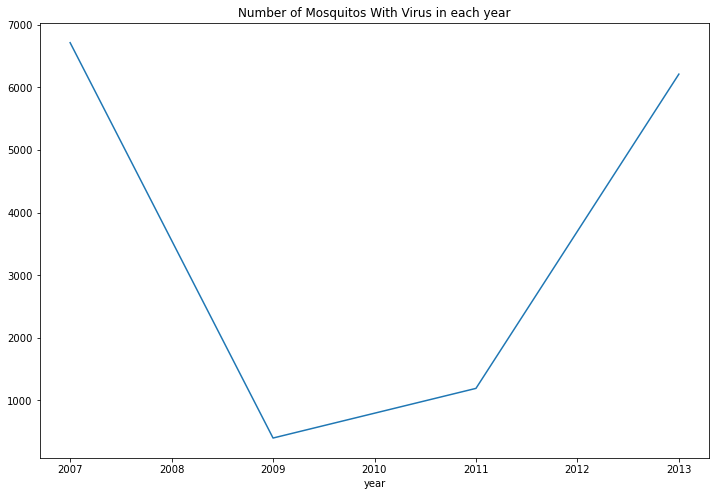

In [332]:
plt.figure(figsize = (12,8))
wnv_df.groupby('year')['nummosquitos'].sum().plot()
plt.title('Number of Mosquitos With Virus in each year');

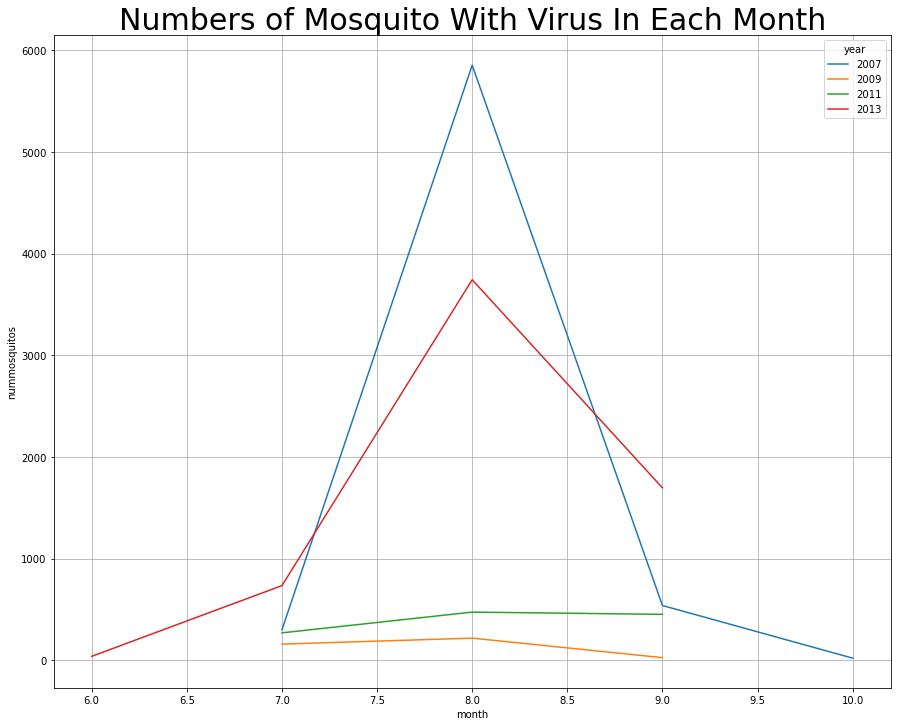

In [333]:
plt.figure(figsize = (15,12))
sns.lineplot(x = 'month', y = 'nummosquitos', data = mosquito_df, hue = 'year', palette = 'tab10')
plt.grid()
plt.title('Numbers of Mosquito With Virus In Each Month', fontsize = 30);

In [334]:
# Create a function that create line plot and compared for each year
def compared_year_plot(dataframe, x, y, hue = None):
    plt.figure(figsize = (15,8))
    sns.lineplot(x = x, y = y, hue =hue, data =dataframe, palette = 'tab10', ci = False)
    plt.grid()
    plt.title(f'{y} in each {x}', fontsize = 20);

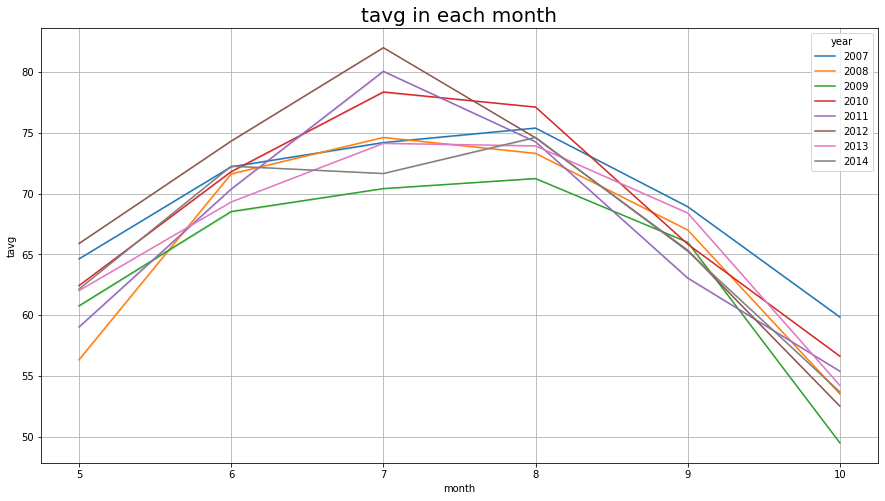

In [335]:
compared_year_plot(weather, x = 'month', y ='tavg', hue = 'year')

### 2007

In [336]:
train.loc['2007'].groupby('month')['nummosquitos'].sum()

month
5        40
6       428
7      7199
8     40015
9      9300
10     1706
Name: nummosquitos, dtype: int64

In [337]:
weather.loc['2007'].groupby('month')['tavg'].mean()

month
5     64.620968
6     72.200000
7     74.193548
8     75.387097
9     68.916667
10    59.838710
Name: tavg, dtype: float64

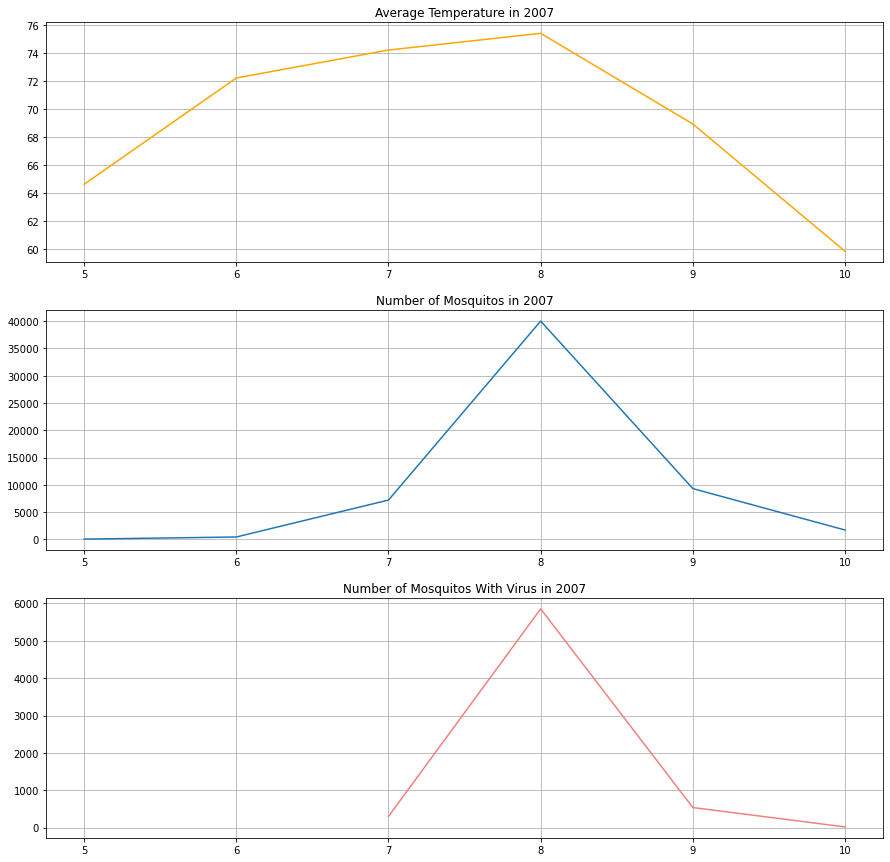

In [338]:
plt.figure(figsize = (15,15))
ax1 = plt.subplot(3,1,1)
ax1.plot(weather.loc['2007'].groupby('month')['tavg'].mean(), color = 'orange')
ax1.set_title('Average Temperature in 2007')
plt.grid();

ax2 = plt.subplot(3,1,2, sharex = ax1)
ax2.plot(train.loc['2007'].groupby('month')['nummosquitos'].sum())
ax2.set_title('Number of Mosquitos in 2007')
plt.grid();

ax3 = plt.subplot(3,1,3, sharex = ax2)
ax3.plot(wnv_df.loc['2007'].groupby('month')['nummosquitos'].sum(), color = 'lightcoral')
ax3.set_title('Number of Mosquitos With Virus in 2007')
plt.grid();

We can see that as the average temperature rise in May and reach the peak in August, it is the same time that number of mosquitos reach the peak and started to drop after the average temperature decreased in September.

### 2008

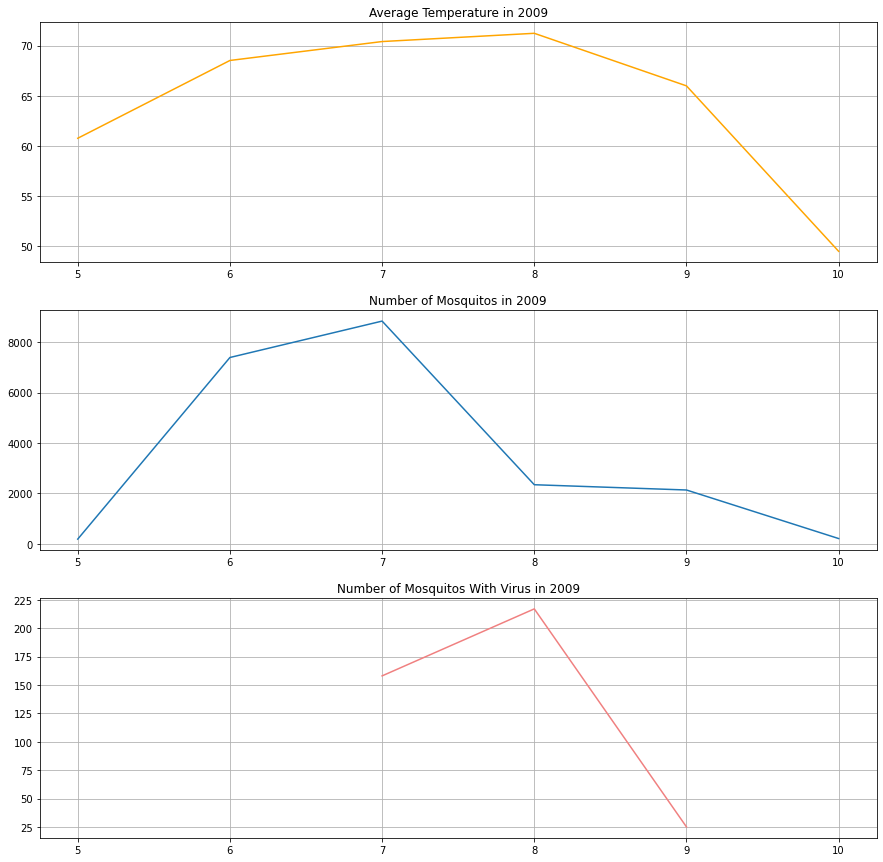

In [339]:
plt.figure(figsize = (15,15))
ax1 = plt.subplot(3,1,1)
ax1.plot(weather.loc['2009'].groupby('month')['tavg'].mean(), color = 'orange')
ax1.set_title('Average Temperature in 2009')
plt.grid();

ax2 = plt.subplot(3,1,2, sharex = ax1)
ax2.plot(train.loc['2009'].groupby('month')['nummosquitos'].sum())
ax2.set_title('Number of Mosquitos in 2009')
plt.grid();

ax3 = plt.subplot(3,1,3, sharex = ax2)
ax3.plot(wnv_df.loc['2009'].groupby('month')['nummosquitos'].sum(), color = 'lightcoral')
ax3.set_title('Number of Mosquitos With Virus in 2009')
plt.grid();

### 2011

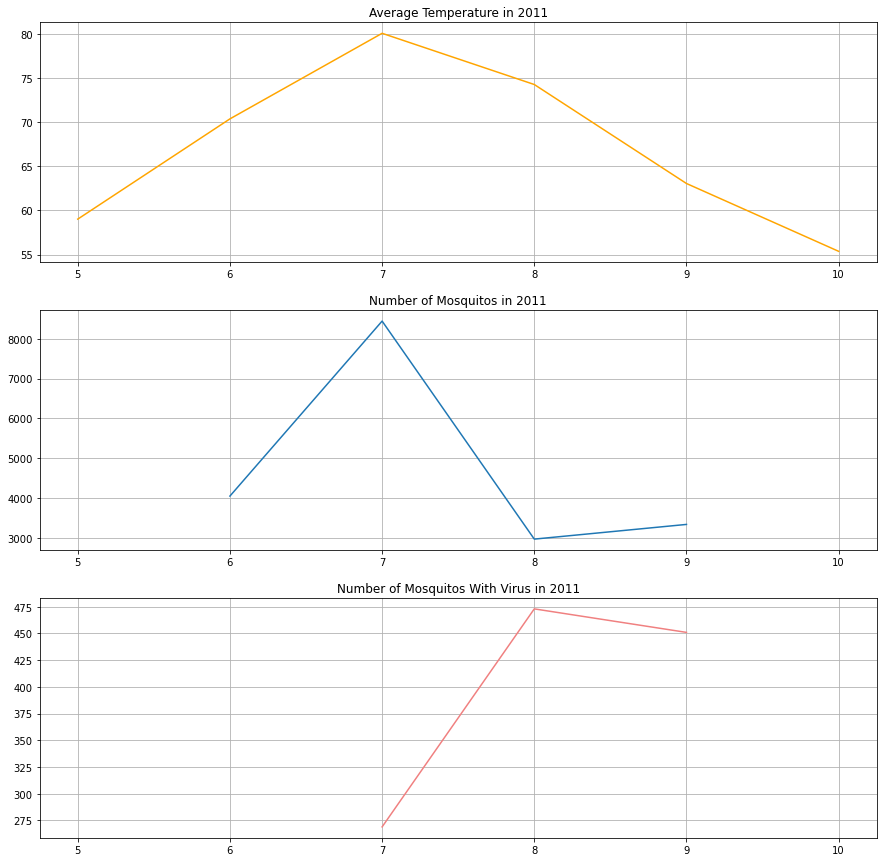

In [340]:
plt.figure(figsize = (15,15))
ax1 = plt.subplot(3,1,1)
ax1.plot(weather.loc['2011'].groupby('month')['tavg'].mean(), color = 'orange')
ax1.set_title('Average Temperature in 2011')
plt.grid();

ax2 = plt.subplot(3,1,2, sharex = ax1)
ax2.plot(train.loc['2011'].groupby('month')['nummosquitos'].sum())
ax2.set_title('Number of Mosquitos in 2011')
plt.grid();

ax3 = plt.subplot(3,1,3, sharex = ax2)
ax3.plot(wnv_df.loc['2011'].groupby('month')['nummosquitos'].sum(), color = 'lightcoral')
ax3.set_title('Number of Mosquitos With Virus in 2011')
plt.grid();

### 2013

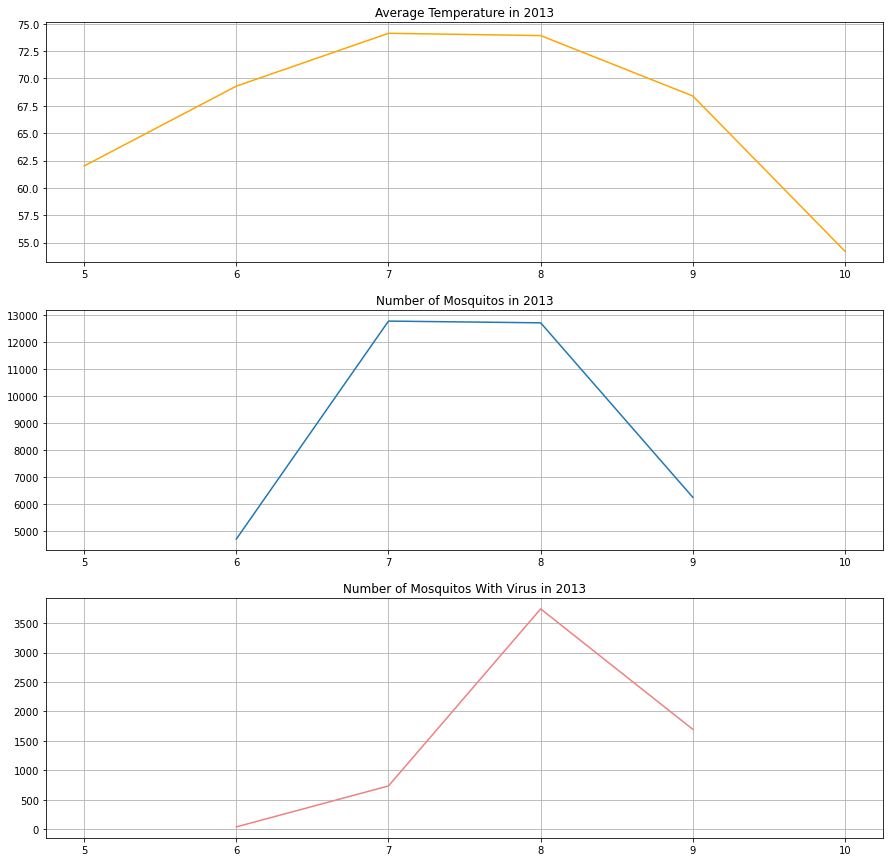

In [341]:
plt.figure(figsize = (15,15))
ax1 = plt.subplot(3,1,1)
ax1.plot(weather.loc['2013'].groupby('month')['tavg'].mean(), color = 'orange')
ax1.set_title('Average Temperature in 2013')
plt.grid();

ax2 = plt.subplot(3,1,2, sharex = ax1)
ax2.plot(train.loc['2013'].groupby('month')['nummosquitos'].sum())
ax2.set_title('Number of Mosquitos in 2013')
plt.grid();

ax3 = plt.subplot(3,1,3, sharex = ax2)
ax3.plot(wnv_df.loc['2013'].groupby('month')['nummosquitos'].sum(), color = 'lightcoral')
ax3.set_title('Number of Mosquitos With Virus in 2013')
plt.grid();

In [342]:
weather.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'depth',
       'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed', 'year', 'month'],
      dtype='object')

Look correlation for similar columns

In [343]:
weather.corr()

station      tmax      tmin      tavg    depart  dewpoint  \
station      1.000000  0.016332  0.103995  0.060040  0.000000  0.007511   
tmax         0.016332  1.000000  0.859981  0.967664  0.681827  0.801733   
tmin         0.103995  0.859981  1.000000  0.960328  0.573208  0.904358   
tavg         0.060040  0.967664  0.960328  1.000000  0.653156  0.881447   
depart       0.000000  0.681827  0.573208  0.653156  1.000000  0.544273   
dewpoint     0.007511  0.801733  0.904358  0.881447  0.544273  1.000000   
wetbulb      0.029012  0.904683  0.951490  0.960737  0.605109  0.972370   
heat        -0.035826 -0.857467 -0.819030 -0.870337 -0.517022 -0.773914   
cool         0.066112  0.832785  0.859142  0.876820  0.625524  0.770554   
codesum      0.000682 -0.050056  0.087952  0.015673  0.061635  0.261186   
depth             NaN       NaN       NaN       NaN       NaN       NaN   
snowfall     0.000000 -0.077527 -0.072669 -0.077957 -0.036936 -0.073228   
preciptotal -0.008389  0.038420  0.106543  0.073330  0.063118  0.232289   
stnpressure  0.190541 -0.156503 -0.202479 -0.185297 -0.261410 -0.303320   
sealevel    -0.029413 -0.208378 -0.282639 -0.252931 -0.284597 -0.353331   
resultspeed -0.007368 -0.180596 -0.114755 -0.154864  0.010059 -0.189207   
resultdir   -0.016035  0.029231 -0.014283  0.008736  0.099266  0.003466   
avgspeed     0.003071 -0.167598 -0.100906 -0.140969  0.037813 -0.154119   
year         0.000000 -0.000252 -0.006427 -0.002543 -0.027118 -0.000139   
month        0.000000 -0.262495 -0.206202 -0.244792 -0.036105 -0.137352   

              wetbulb      heat      cool   codesum  depth  snowfall  \
station      0.029012 -0.035826  0.066112  0.000682    NaN  0.000000   
tmax         0.904683 -0.857467  0.832785 -0.050056    NaN -0.077527   
tmin         0.951490 -0.819030  0.859142  0.087952    NaN -0.072669   
tavg         0.960737 -0.870337  0.876820  0.015673    NaN -0.077957   
depart       0.605109 -0.517022  0.625524  0.061635    NaN -0.036936   
dewpoint     0.972370 -0.773914  0.770554  0.261186    NaN -0.073228   
wetbulb      1.000000 -0.847898  0.835367  0.146138    NaN -0.081433   
heat        -0.847898  1.000000 -0.530525 -0.006275    NaN  0.112053   
cool         0.835367 -0.530525  1.000000  0.020664    NaN -0.025166   
codesum      0.146138 -0.006275  0.020664  1.000000    NaN  0.041277   
depth             NaN       NaN       NaN       NaN    NaN       NaN   
snowfall    -0.081433  0.112053 -0.025166  0.041277    NaN  1.000000   
preciptotal  0.164848 -0.064873  0.064117  0.354473    NaN  0.006392   
stnpressure -0.252270  0.163987 -0.159994 -0.323020    NaN  0.033941   
sealevel    -0.311045  0.217836 -0.223934 -0.316319    NaN  0.034333   
resultspeed -0.181627  0.204698 -0.070080  0.010312    NaN  0.119782   
resultdir    0.004677  0.080223  0.093815  0.051625    NaN  0.051687   
avgspeed    -0.159192  0.198212 -0.052489  0.101220    NaN  0.127746   
year        -0.005245  0.029604  0.021592 -0.022483    NaN  0.043189   
month       -0.196870  0.266034 -0.162430 -0.034117    NaN  0.042089   

             preciptotal  stnpressure  sealevel  resultspeed  resultdir  \
station        -0.008389     0.190541 -0.029413    -0.007368  -0.016035   
tmax            0.038420    -0.156503 -0.208378    -0.180596   0.029231   
tmin            0.106543    -0.202479 -0.282639    -0.114755  -0.014283   
tavg            0.073330    -0.185297 -0.252931    -0.154864   0.008736   
depart          0.063118    -0.261410 -0.284597     0.010059   0.099266   
dewpoint        0.232289    -0.303320 -0.353331    -0.189207   0.003466   
wetbulb         0.164848    -0.252270 -0.311045    -0.181627   0.004677   
heat           -0.064873     0.163987  0.217836     0.204698   0.080223   
cool            0.064117    -0.159994 -0.223934    -0.070080   0.093815   
codesum         0.354473    -0.323020 -0.316319     0.010312   0.051625   
depth                NaN          NaN       NaN          NaN        NaN   
snowfall        0.006392 

In [344]:
weather[['dewpoint','wetbulb']].corr()

dewpoint  wetbulb
dewpoint   1.00000  0.97237
wetbulb    0.97237  1.00000

In [345]:
def scatter_plot(dataframe, x, y):
    plt.figure(figsize = (12,8))
    sns.scatterplot(x = x, y=y, data = dataframe)
    plt.title(f'{x} vs {y}');

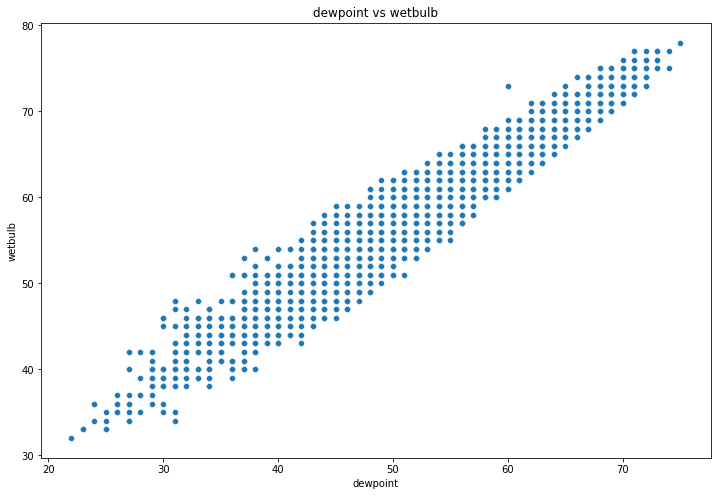

In [346]:
scatter_plot(weather, 'dewpoint','wetbulb')

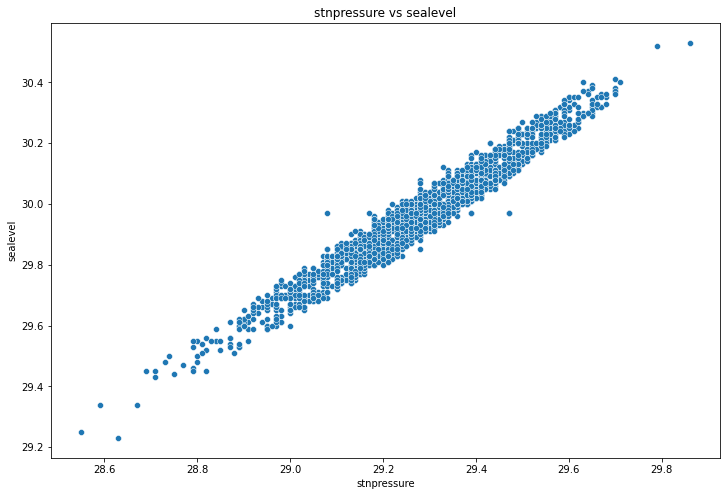

In [347]:
scatter_plot(weather, 'stnpressure','sealevel')

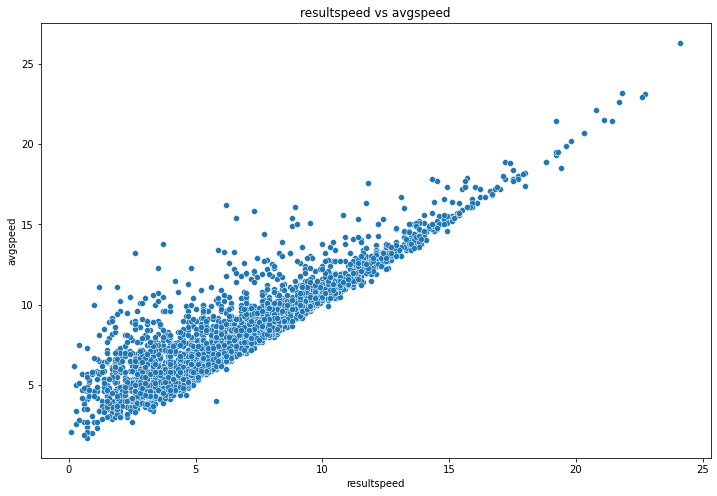

In [348]:
scatter_plot(weather, 'resultspeed','avgspeed')

In [349]:
weather['depth']

date
2007-05-01    0
2007-05-01    0
2007-05-02    0
2007-05-02    0
2007-05-03    0
             ..
2014-10-29    0
2014-10-30    0
2014-10-30    0
2014-10-31    0
2014-10-31    0
Name: depth, Length: 2944, dtype: int32

Since we know that mosquitos that contain virus are increasing the most in july to august, I will plot all of the column that might relate with the virus.

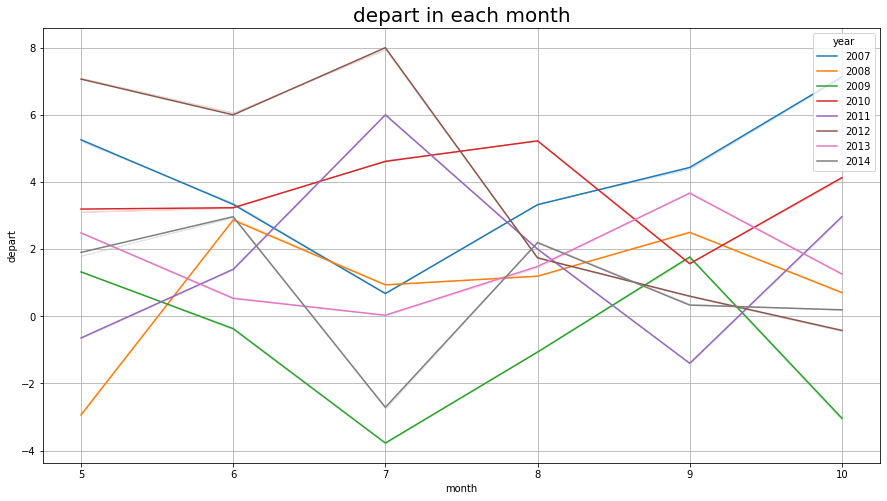

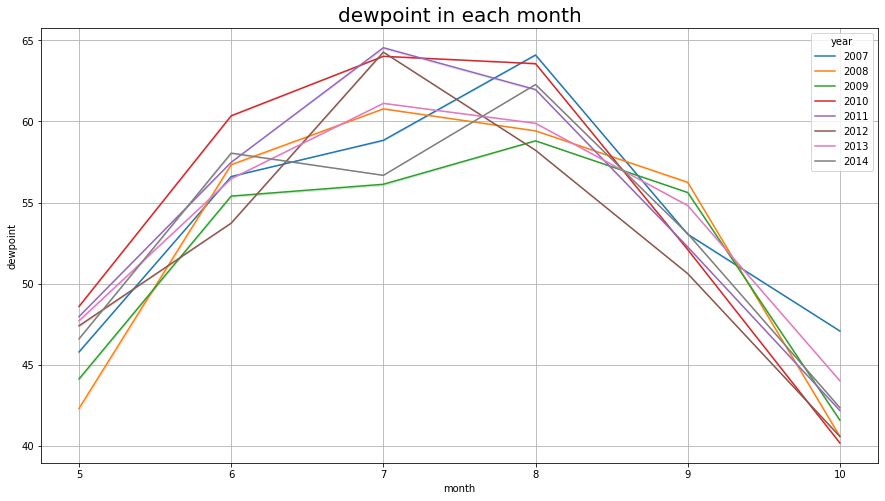

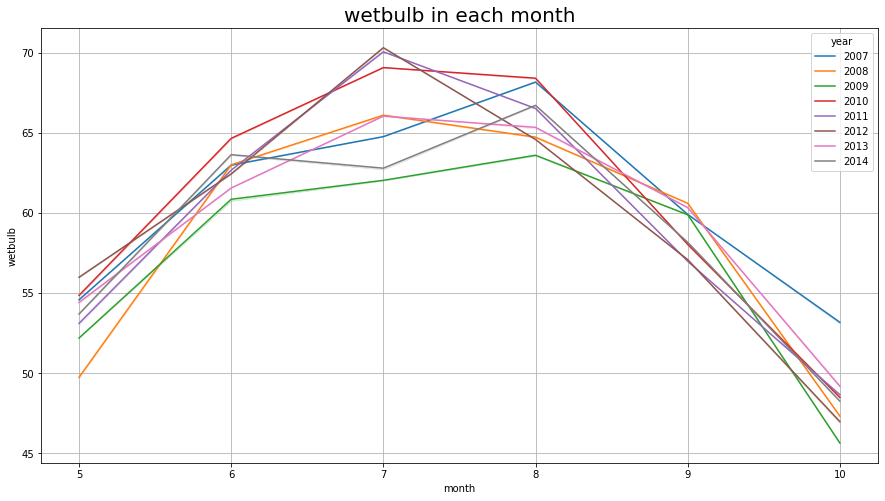

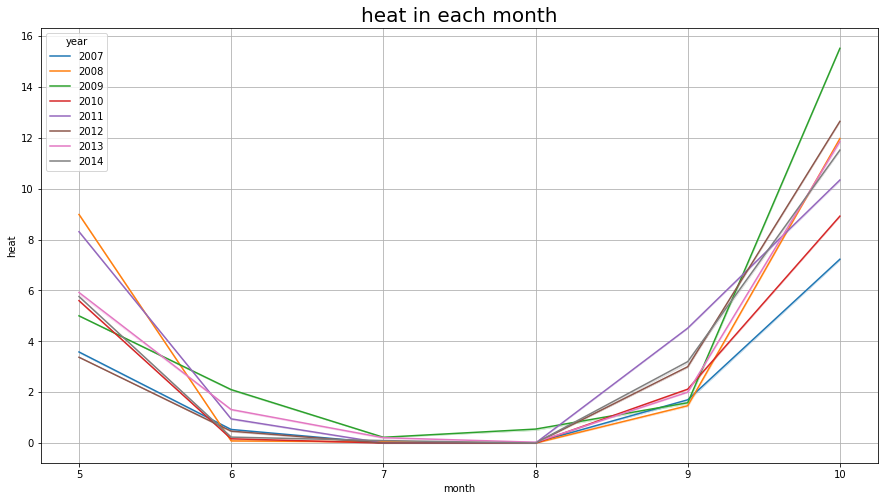

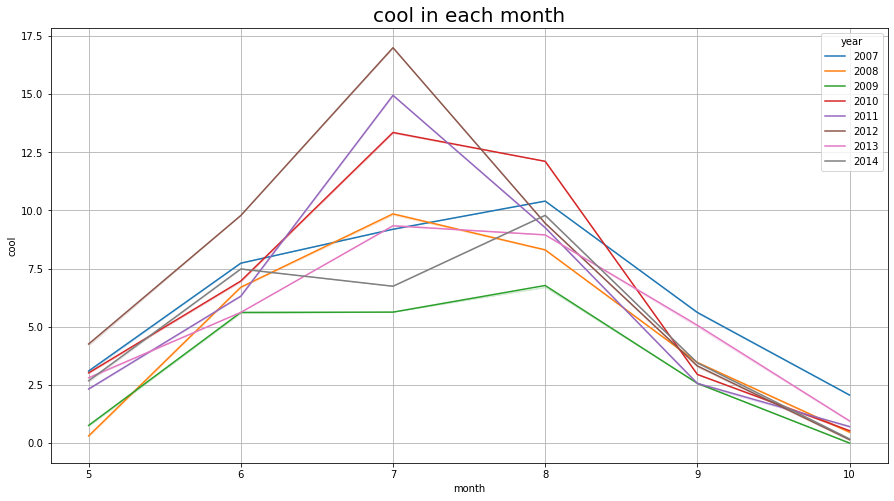

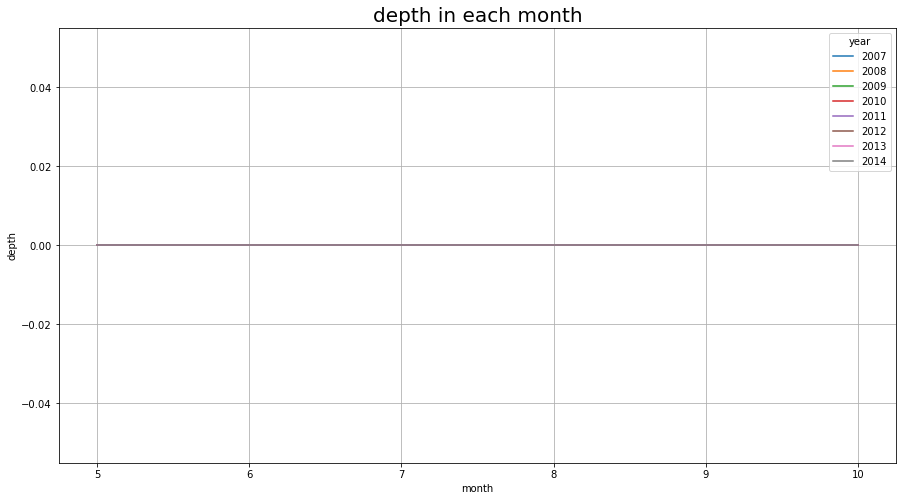

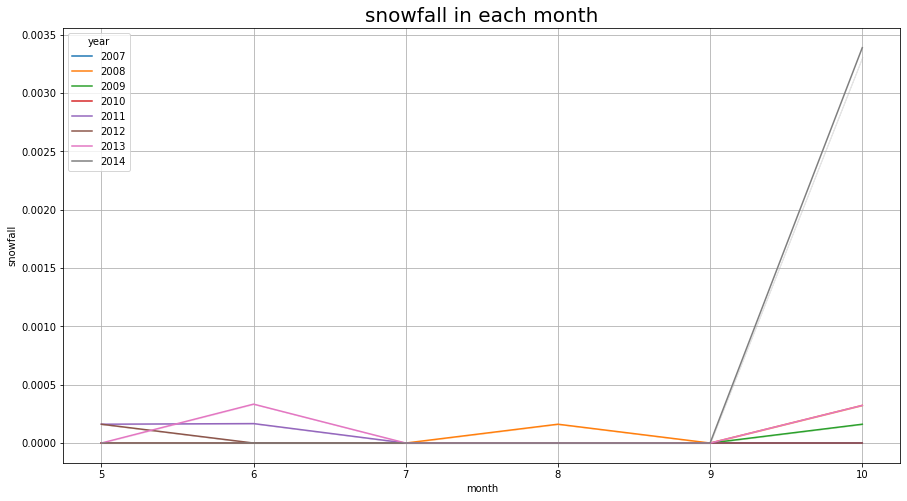

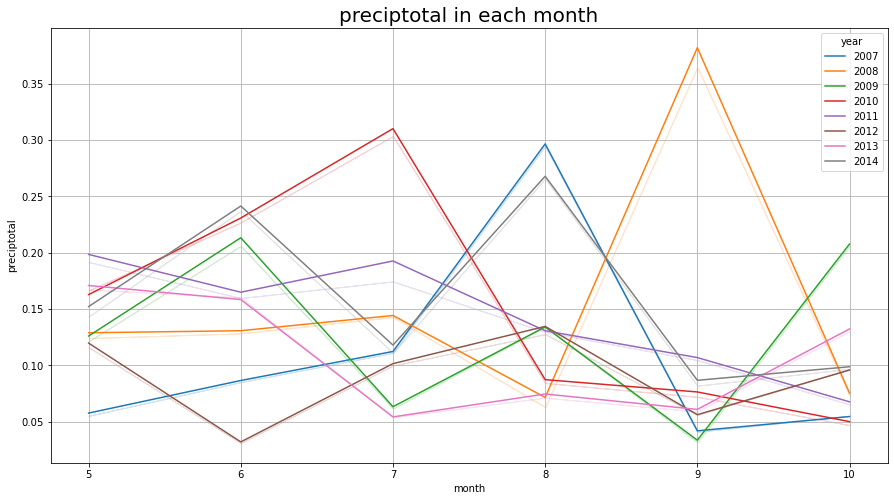

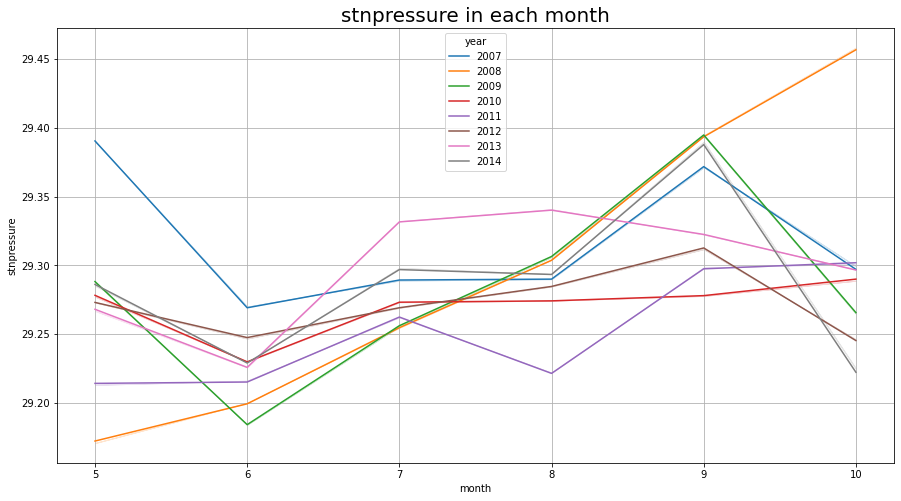

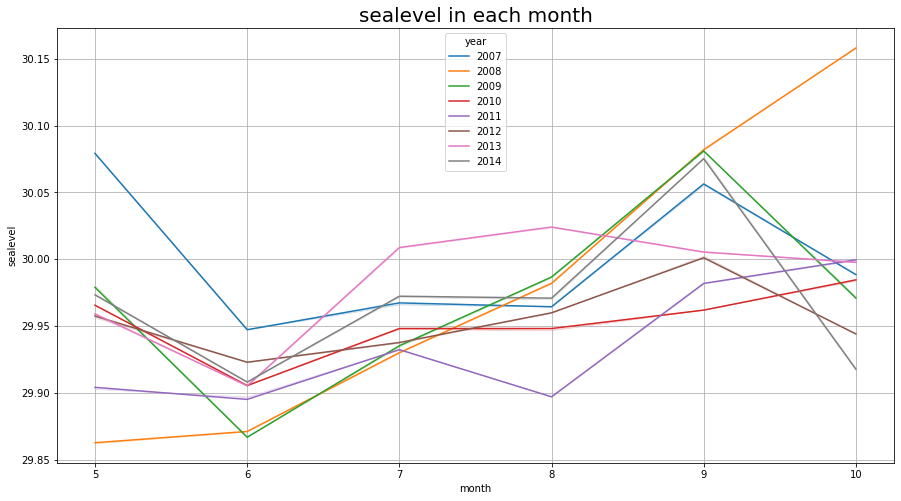

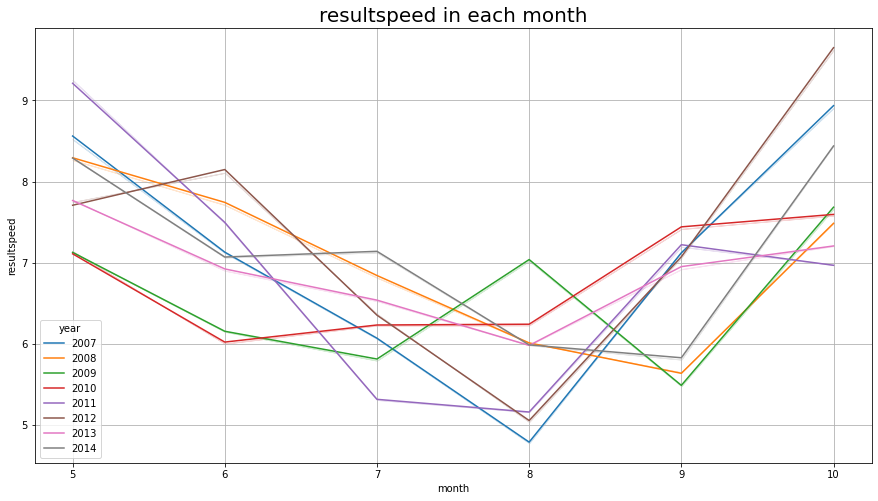

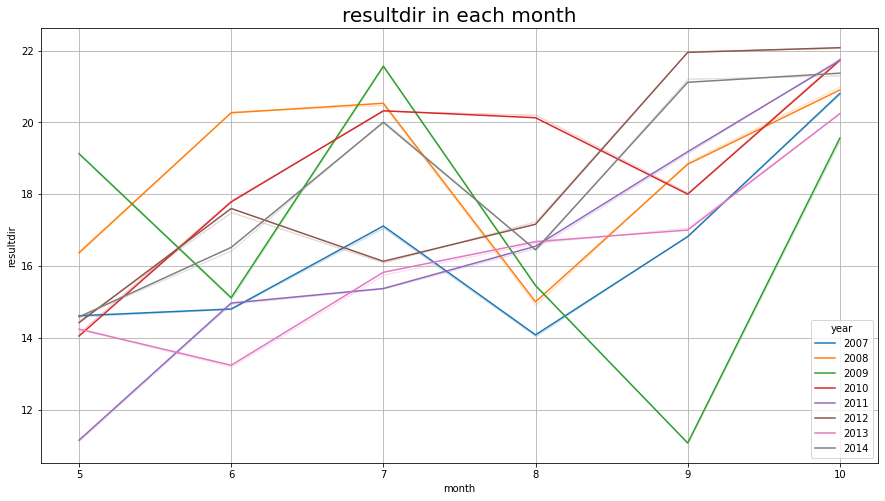

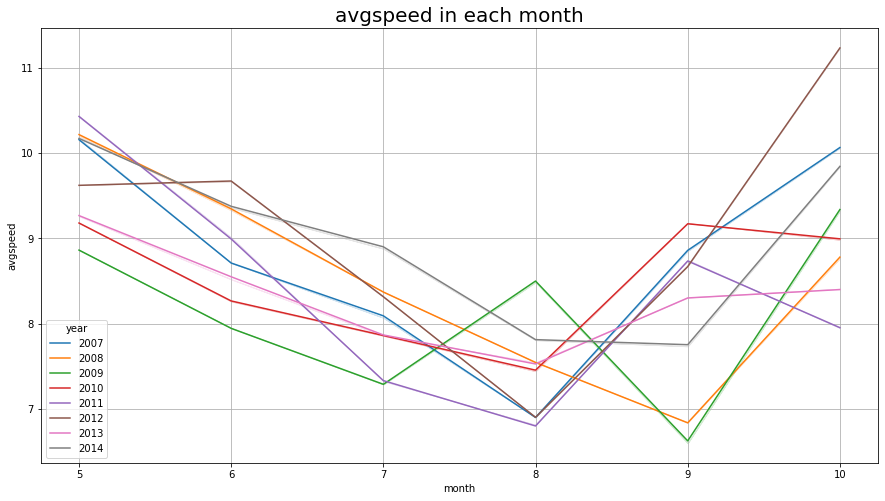

In [350]:
col = [col for col in weather.columns if col not in ['station','date','tmax','tmin','tavg','sunrise','sunset','codesum','year','month']]
for i in col:
    compared_year_plot(weather, x = 'month', y = i, hue = 'year')

In [351]:
def line_plot(dataframe, feature):
    plt.figure(figsize = (12,8))
    sns.lineplot(x = 'year', y = feature, data = dataframe, hue ='station', ci = False)
    plt.title(f'{feature}')

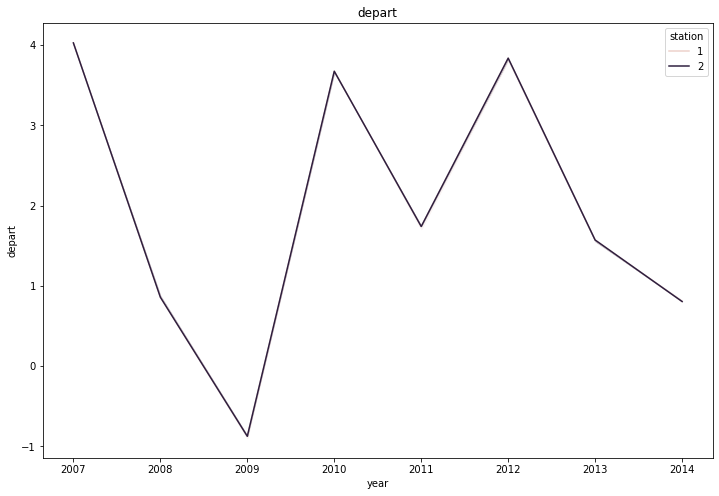

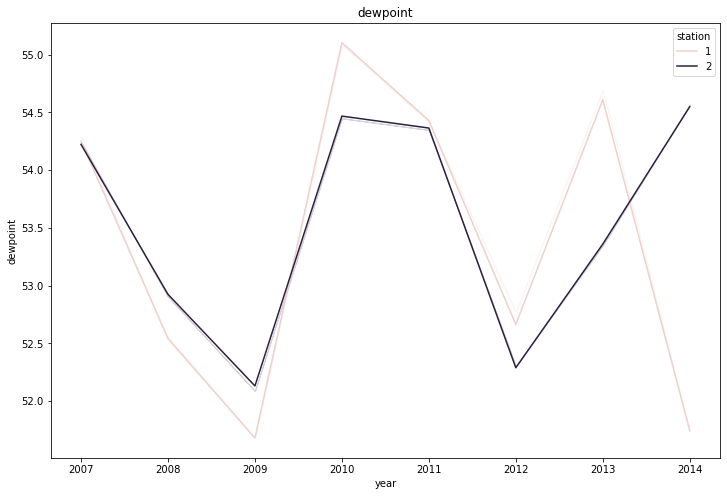

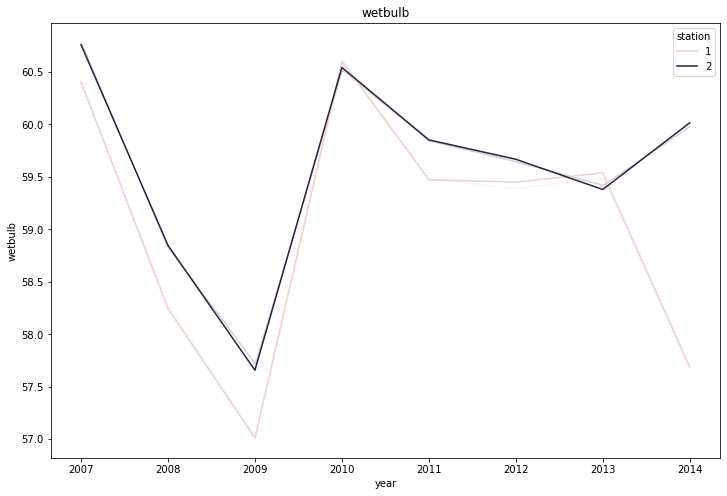

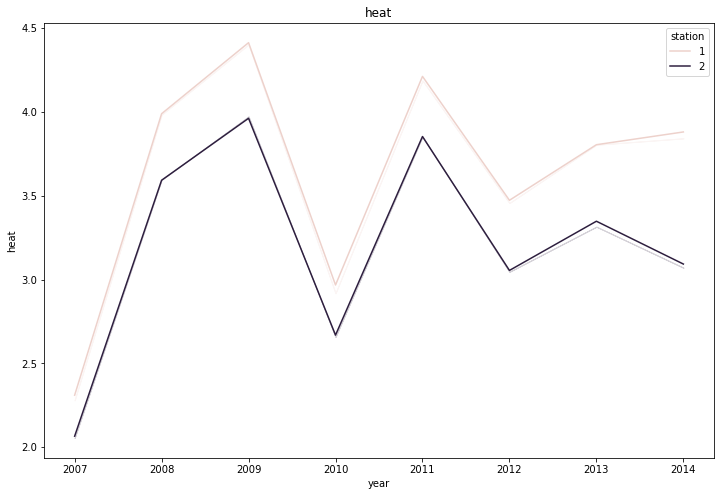

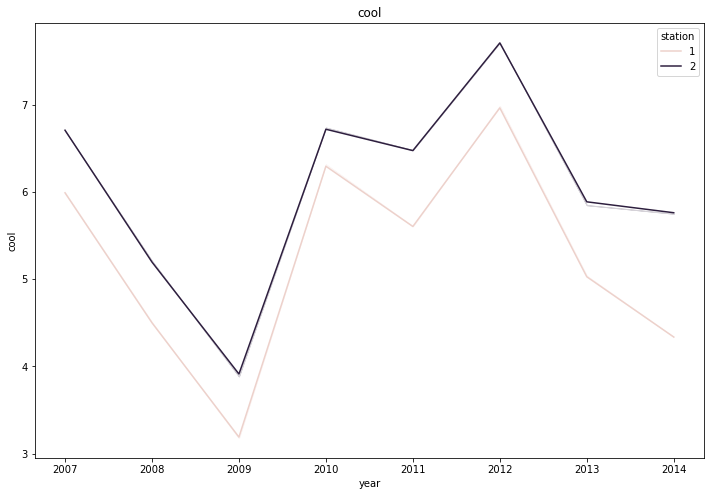

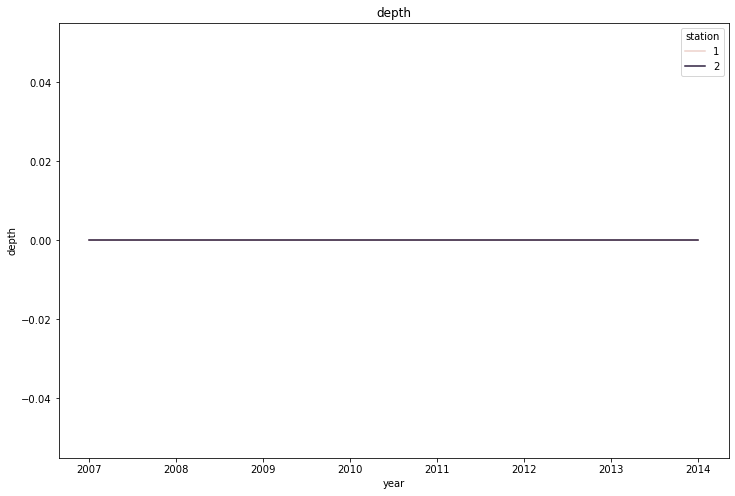

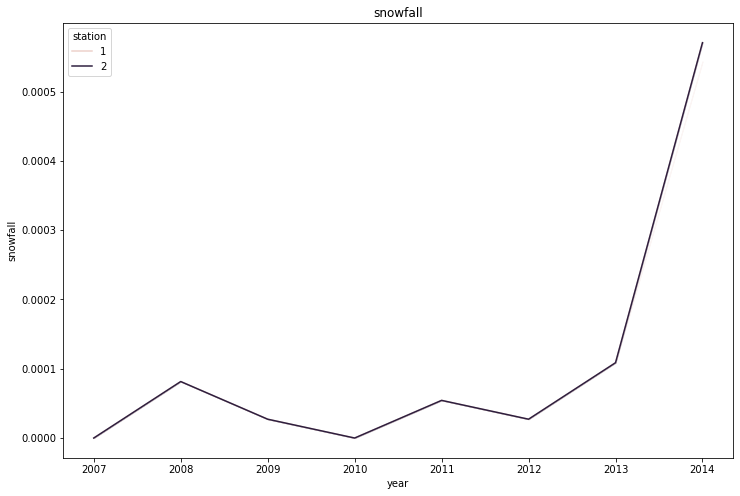

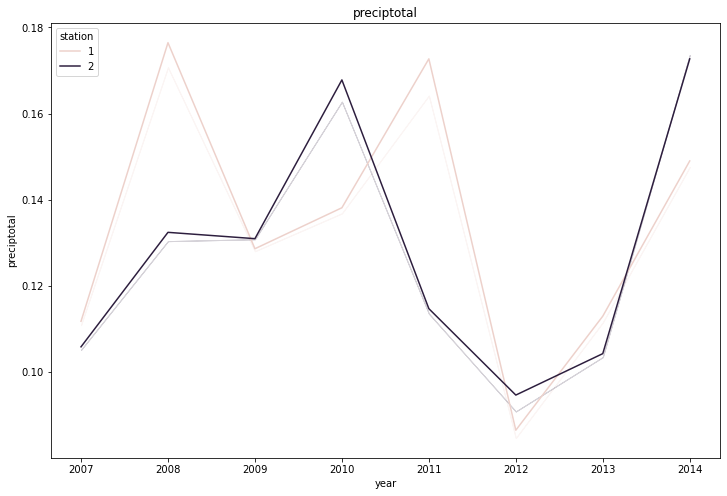

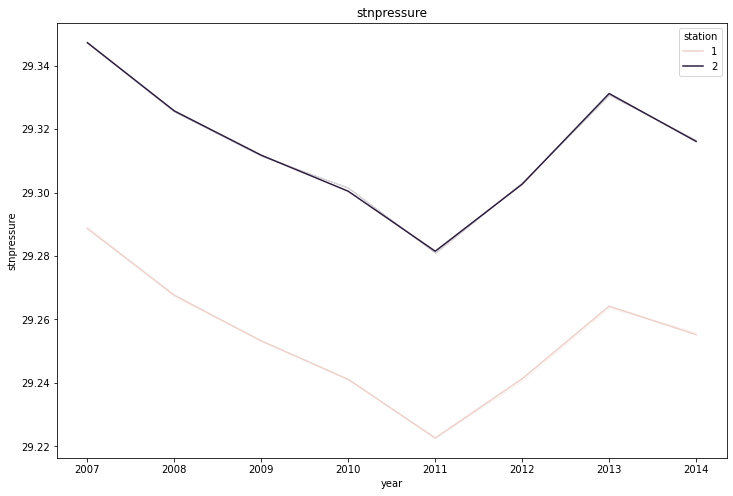

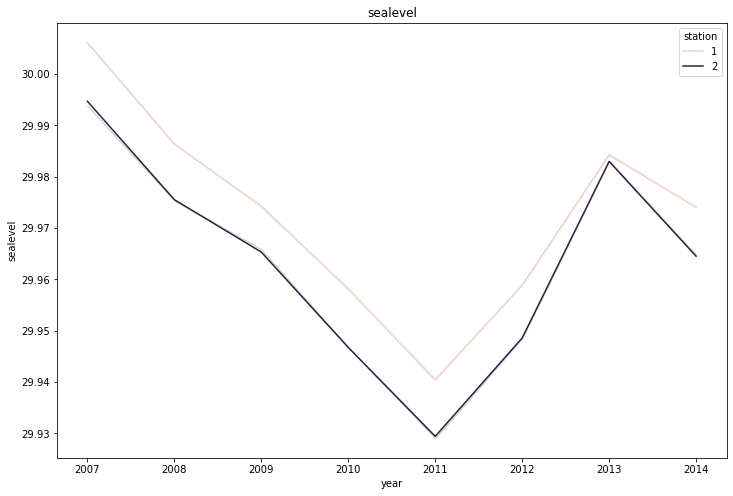

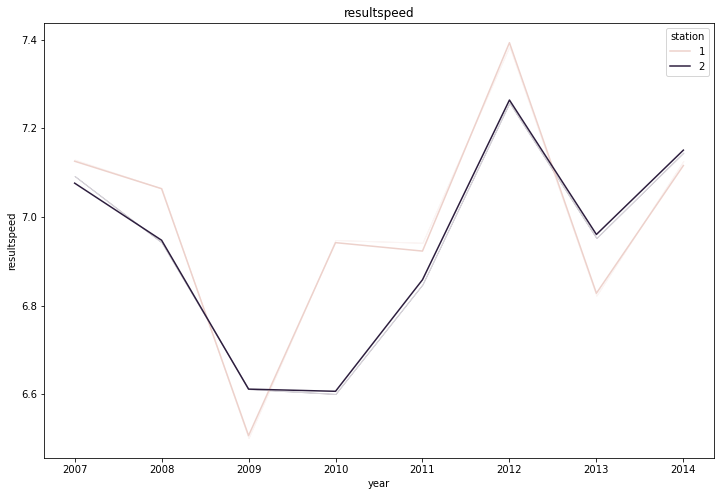

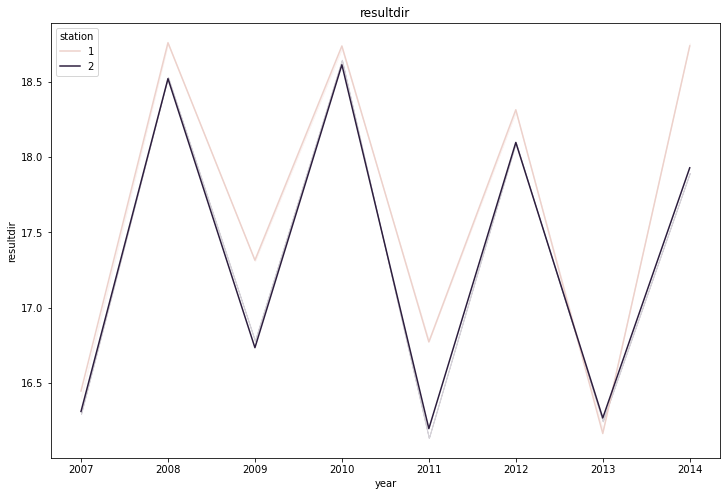

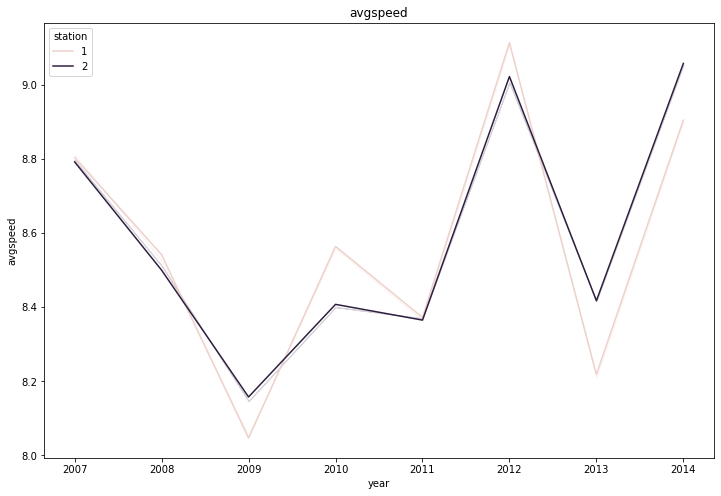

In [352]:
for i in col:
    line_plot(weather, i)

# Map Data

In [353]:
mapdata = np.loadtxt("data/map-data/mapdata_copyright_openstreetmap_contributors.txt")
spray = spray.set_index('date')

In [354]:
def plot_map(mapdata, spray_data = spray, trap_data = train, title = None, show_spray = None, show_trap = None):
    mapdata = np.loadtxt("data/map-data/mapdata_copyright_openstreetmap_contributors.txt")
    aspect = mapdata.shape[0] * 1.0 /mapdata.shape[1]
    lon_lat_box = (-88, -87.5, 41.6, 42.1)
    
    # Plot map
    plt.figure(figsize = (10,14))
    plt.imshow(mapdata, cmap = plt.get_cmap('gray'), extent = lon_lat_box, aspect = aspect)
    
    # Spray locations
    if show_spray != None:
        sprays = spray_data[['longitude','latitude']].drop_duplicates()
        plt.scatter(sprays['longitude'], sprays['latitude'], marker = '*', color = 'orange', alpha = 0.05, label = 'Spray Locations')
    else:
        pass
    
    # Trap locations
    if show_trap != None:
        location = trap_data[['longitude','latitude']].drop_duplicates().values
        plt.scatter(location[:,0], location[:,1], marker = 'x', label = 'Trap Locations')

    else:
        pass

    
    # Weather station location
    plt.scatter(x = (-87.933, -87.752), y = (41.995, 41.786), marker='o', color='r', label='Weather Station')
    
    plt.title(title)
    plt.legend(frameon=1)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude');

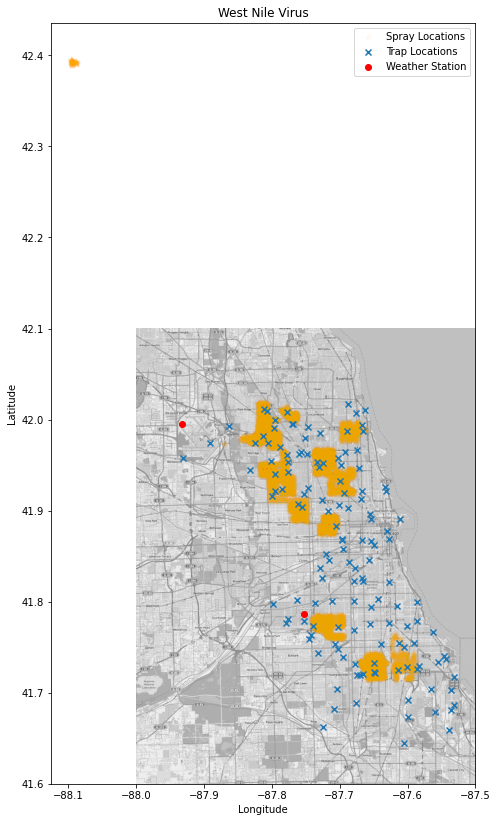

In [355]:
plot_map(mapdata, show_spray = 'Yes', show_trap = 'Yes', title = 'West Nile Virus')

In [356]:
# If we look at graph above we can see that there are an outlier, so I will drop it first
spray[spray['latitude'] > 42.3].head()

latitude  longitude
date                            
2011-08-29  42.391623 -88.089163
2011-08-29  42.391348 -88.089163
2011-08-29  42.391022 -88.089157
2011-08-29  42.390637 -88.089158
2011-08-29  42.390410 -88.088858

In [357]:
spray.drop(spray[spray['latitude'] > 42.3].index, inplace = True)

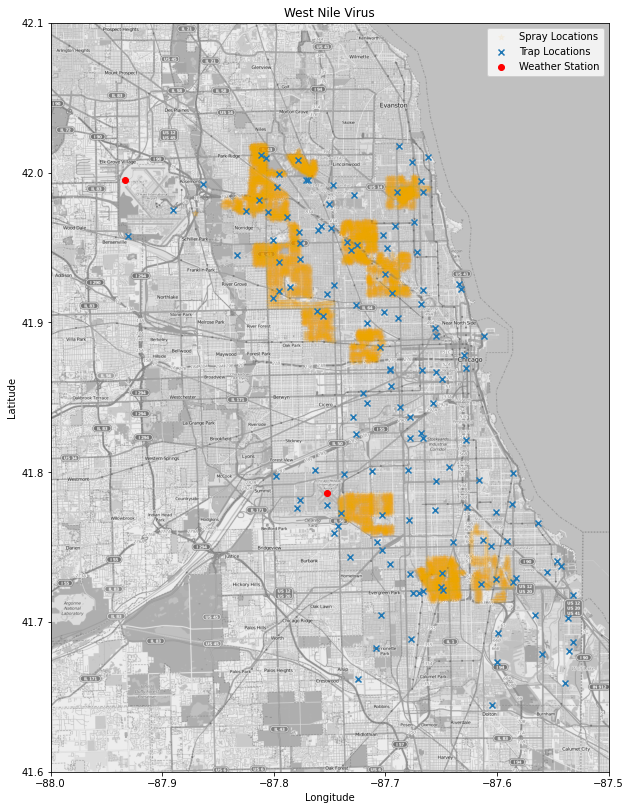

In [358]:
plot_map(mapdata, show_spray = 'Yes', show_trap = 'Yes', title = 'West Nile Virus')

# Mosquitos

In [359]:
def line_plot2(dataframe, x, y, marker = None,ci = False, hue = None, title = None, show_peak_val = None):
    plt.figure(figsize = (18,12))
    sns.lineplot(x = x, y = y, data = dataframe, marker = marker, ci = ci, hue = hue, markersize = 10)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
    plt.xticks(rotation = 45)
    
    # Show peak value
    if show_peak_val == None:
        pass
    else:
        max_x = dataframe.sort_values(by= y, ascending=False).index[0]
        max_y = dataframe.sort_values(by= y, ascending=False)[y][0]
        plt.text(x=max_x, y=max_y, s="(" + str(max_y) + ")", alpha=0.7, color='purple', fontsize = "17", fontweight="bold")
    
    plt.xlabel(f'{x}', fontsize = 20)
    plt.ylabel(f'{y}', fontsize = 20)
    if title == None:
        plt.title(f'Total {y} count by {x}', fontsize = 30)
    else:
        plt.title(title, fontsize = 30);

In [360]:
# Now date column is an index, so I will reset index first
train.reset_index(inplace = True)

# Create column year month
train['yearmonth'] = train['date'].apply(lambda x: '{}-{:02d}'.format(x.year, x.month))

In [361]:
# After create year month column set date as index
train = train.set_index('date')

In [362]:
train.head(2)

address  \
date                                                            
2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                           species  block           street  trap  \
date                                                               
2007-05-29  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
2007-05-29          CULEX RESTUANS     41   N OAK PARK AVE  T002   

                       addressnumberandstreet  latitude  longitude  \
date                                                                 
2007-05-29  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991   
2007-05-29  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991   

            addressaccuracy  nummosquitos  wnvpresent  year  month  day  \
date                                                                      
2007-05-29                9             1           0  2007      5   29   
2007-05-29                9             1           0  2007      5   29   

           yearmonth  
date                  
2007-05-29   2007-05  
2007-05-29   2007-05

In [366]:
train.shape

(10506, 15)

In [363]:
def get_df_groupby(dataframe, col1, col2 = None):
    if col2 == None:
        return pd.DataFrame(dataframe.groupby(col1).sum())
    
    else:
        return pd.DataFrame(dataframe.groupby([col1, col2]).sum())

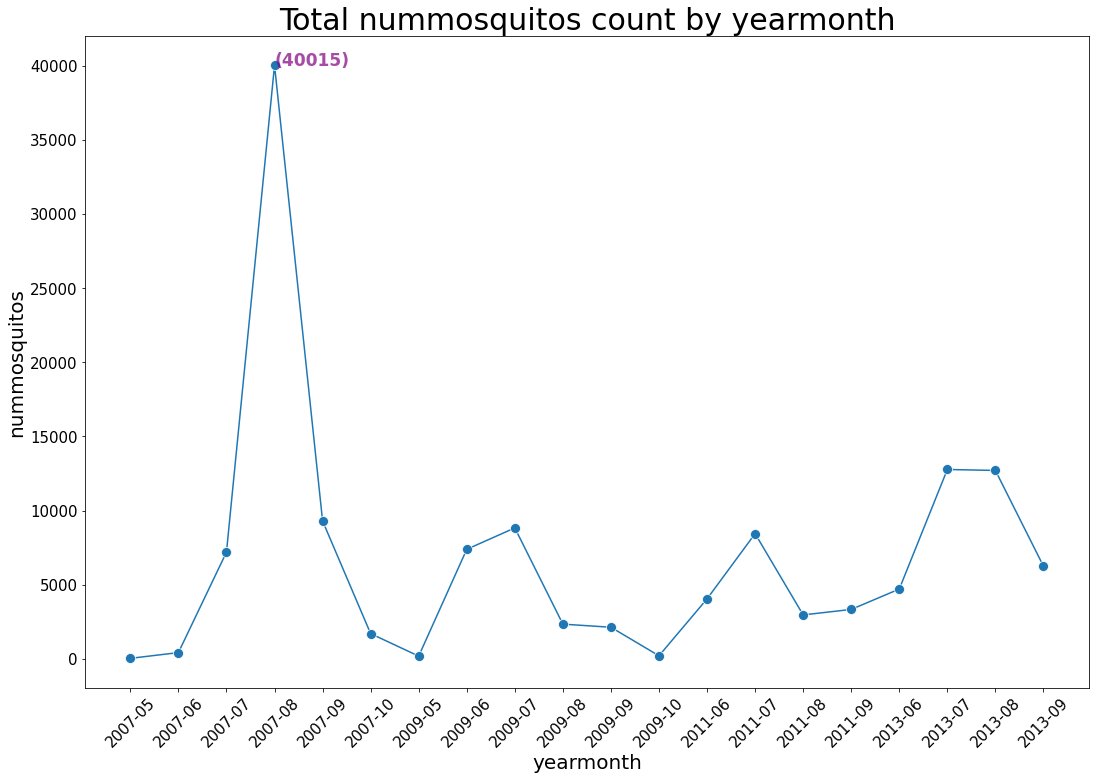

In [364]:
line_plot2(get_df_groupby(train, 'yearmonth'), x = 'yearmonth', y = 'nummosquitos', marker = 'o', show_peak_val = 'Yes')

## Total Mosquito

In [365]:
species_df = get_df_groupby(train, 'yearmonth','species')
species_df.head()

block     latitude    longitude  \
yearmonth species                                                   
2007-05   CULEX PIPIENS              22    41.731922   -87.677512   
          CULEX PIPIENS/RESTUANS    389   377.233204  -789.377994   
          CULEX RESTUANS            495   627.956984 -1315.348752   
2007-06   CULEX PIPIENS             287   501.615905 -1052.366682   
          CULEX PIPIENS/RESTUANS   2590  2680.927292 -5614.027070   

                                  addressaccuracy  nummosquitos  wnvpresent  \
yearmonth species                                                             
2007-05   CULEX PIPIENS                         8             1           0   
          CULEX PIPIENS/RESTUANS               70            10           0   
          CULEX RESTUANS                      120            29           0   
2007-06   CULEX PIPIENS                       101            20           0   
          CULEX PIPIENS/RESTUANS              533           121           0   

                                    year  month   day  
yearmonth species                                      
2007-05   CULEX PIPIENS             2007      5    29  
          CULEX PIPIENS/RESTUANS   18063     45   261  
          CULEX RESTUANS           30105     75   435  
2007-06   CULEX PIPIENS            24084     72   219  
          CULEX PIPIENS/RESTUANS  128448    384  1295

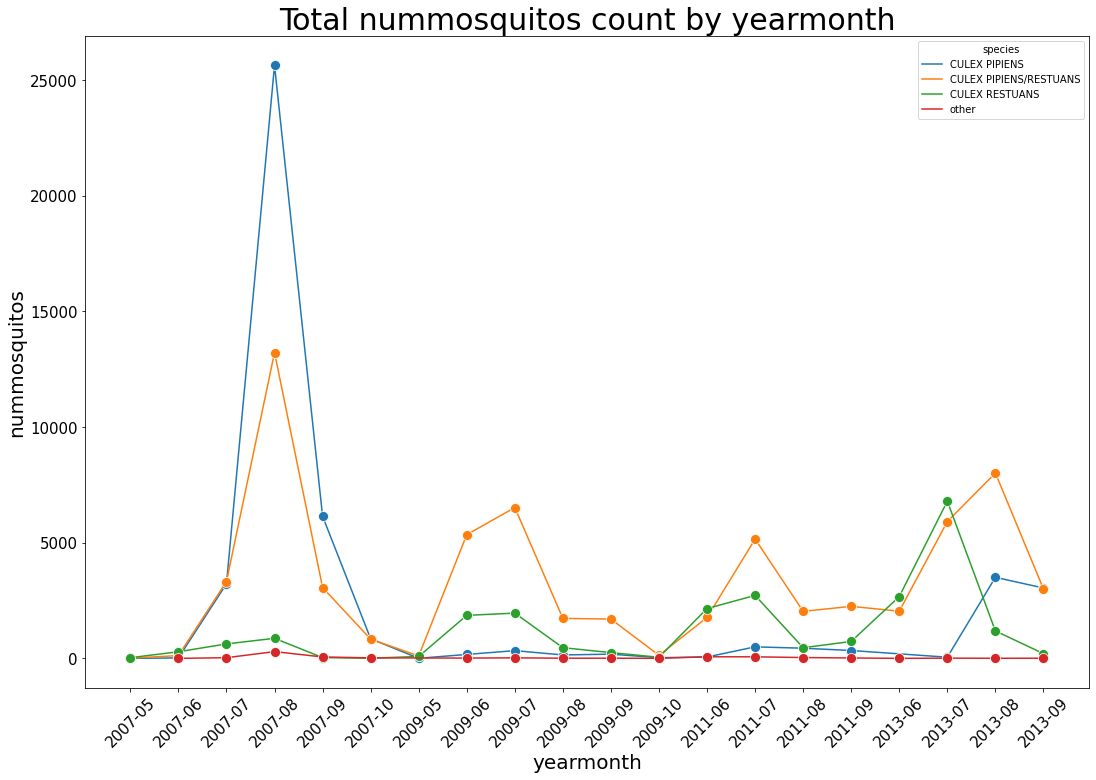

In [206]:
line_plot2(species_df, x = 'yearmonth', y = 'nummosquitos', marker = 'o', hue = 'species')

# Export Cleaned File To Use In Modeling Part

In [ ]:
train.to_csv('data/cleaned/train_cleaned.csv', index = False)
test.to_csv('data/cleaned/train_cleaned.csv', index = False)
weather.to_csv('data/cleaned/train_cleaned.csv', index = False)